# Project Five
# Game of Thrones - Word 2 Vec

In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
from nltk import Tree
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from nltk.parse import ProjectiveDependencyParser
from nltk.parse import NonprojectiveDependencyParser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [5]:
pd.set_option('display.max_columns', 175)

## Importing and Cleaning Dialogue Lists

In [6]:
import pickle

with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s101.pkl', 'rb') as f:
    dialogue101 = pickle.load(f)
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s102.pkl', 'rb') as f:
    dialogue102 = pickle.load(f)
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s103.pkl', 'rb') as f:
    dialogue103 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s104.pkl', 'rb') as f:
    dialogue104 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s105.pkl', 'rb') as f:
    dialogue105 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s106.pkl', 'rb') as f:
    dialogue106 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s107.pkl', 'rb') as f:
    dialogue107 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s108.pkl', 'rb') as f:
    dialogue108 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s109.pkl', 'rb') as f:
    dialogue109 = pickle.load(f) 
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s110.pkl', 'rb') as f:
    dialogue110 = pickle.load(f) 
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s501.pkl', 'rb') as f:
    dialogue501 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s502.pkl', 'rb') as f:
    dialogue502 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s503.pkl', 'rb') as f:
    dialogue503 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s504.pkl', 'rb') as f:
    dialogue504 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s505.pkl', 'rb') as f:
    dialogue505 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s506.pkl', 'rb') as f:
    dialogue506 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s507.pkl', 'rb') as f:
    dialogue507 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s508.pkl', 'rb') as f:
    dialogue508 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s509.pkl', 'rb') as f:
    dialogue509 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s510.pkl', 'rb') as f:
    dialogue510 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s601.pkl', 'rb') as f:
    dialogue601 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s602.pkl', 'rb') as f:
    dialogue602 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s603.pkl', 'rb') as f:
    dialogue603 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s604.pkl', 'rb') as f:
    dialogue604 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s605.pkl', 'rb') as f:
    dialogue605 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s606.pkl', 'rb') as f:
    dialogue606 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s607.pkl', 'rb') as f:
    dialogue607 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s608.pkl', 'rb') as f:
    dialogue608 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s609.pkl', 'rb') as f:
    dialogue609 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s610.pkl', 'rb') as f:
    dialogue610 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s701.pkl', 'rb') as f:
    dialogue701 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s702.pkl', 'rb') as f:
    dialogue702 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s703.pkl', 'rb') as f:
    dialogue703 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s704.pkl', 'rb') as f:
    dialogue704 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s705.pkl', 'rb') as f:
    dialogue705 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s706.pkl', 'rb') as f:
    dialogue706 = pickle.load(f)     

In [7]:
season_one = (dialogue101 + dialogue102 + dialogue103 + dialogue104 + dialogue105 + dialogue106 + dialogue107
    + dialogue108 + dialogue109 + dialogue110)

season_five = (dialogue501 + dialogue502 + dialogue503 + dialogue504 + dialogue505 + dialogue506 + dialogue507
    + dialogue508 + dialogue509 + dialogue510)

season_six = (dialogue601 + dialogue602 + dialogue603 + dialogue604 + dialogue605 + dialogue606 + dialogue607 
    + dialogue608 + dialogue609 + dialogue610)

season_seven = (dialogue701 + dialogue702 + dialogue703 + dialogue704 + dialogue705 + dialogue706)

In [8]:
corpus = (dialogue101 + dialogue102 + dialogue103 + dialogue104 + dialogue105 + dialogue106 + dialogue107
    + dialogue108 + dialogue109 + dialogue110 + dialogue501 + dialogue502 + dialogue503 + dialogue504 + dialogue505
    + dialogue506 + dialogue507 + dialogue508 + dialogue509 + dialogue510 + dialogue601 + dialogue602 + dialogue603
    + dialogue604 + dialogue605 + dialogue606 + dialogue607 + dialogue608 + dialogue609 + dialogue610 + dialogue701
    + dialogue702 + dialogue703 + dialogue704 + dialogue705 + dialogue706)

In [9]:
episodeS201 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x01TheNorthRemembers.txt', 'r')
dialogue201 = episodeS201.readlines()

episodeS202 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x02TheNightLands.txt', 'r')
dialogue202 = episodeS202.readlines()

episodeS203 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x03WhatisDeadMayNeverDie.txt', 'r')
dialogue203 = episodeS203.readlines()

episodeS204 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x04GardenofBones.txt', 'r')
dialogue204 = episodeS204.readlines()

episodeS205 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x05TheGhostofHarrenhal.txt', 'r')
dialogue205 = episodeS205.readlines()

episodeS206 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x06TheOldGodsandtheNew.txt', 'r')
dialogue206 = episodeS206.readlines()

episodeS207 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x07AManWithoutHonor.txt', 'r')
dialogue207 = episodeS207.readlines()

episodeS208 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x08ThePrinceofWinterfell.txt', 'r')
dialogue208 = episodeS208.readlines()

episodeS209 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x09Blackwater.txt', 'r')
dialogue209 = episodeS209.readlines()

episodeS210 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x10ValarMorghulis.txt', 'r')
dialogue210 = episodeS210.readlines()

episodeS301 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x01ValarDohaeris.txt', 'r')
dialogue301 = episodeS301.readlines()

episodeS302 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x02DarkWingsDarkWords.txt', 'r')
dialogue302 = episodeS302.readlines()

episodeS303 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x03WalkofPunishment.txt', 'r')
dialogue303 = episodeS303.readlines()

episodeS304 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x04AndNowHisWatchisEnded.txt', 'r')
dialogue304 = episodeS304.readlines()

episodeS305 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x05KissedbyFire.txt', 'r')
dialogue305 = episodeS305.readlines()

episodeS306 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x06TheClimb.txt', 'r')
dialogue306 = episodeS306.readlines()

episodeS307 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x07TheBearandtheMaidenFair.txt', 'r')
dialogue307 = episodeS307.readlines()

episodeS308 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x08SecondSons.txt', 'r')
dialogue308 = episodeS308.readlines()

episodeS309 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x09TheRainsofCastamere.txt', 'r')
dialogue309 = episodeS309.readlines()

episodeS310 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x10Mhysa.txt', 'r')
dialogue310 = episodeS310.readlines()

episodeS401 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x01TwoSwords.txt', 'r')
dialogue401 = episodeS401.readlines()

episodeS402 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x02TheLionandtheRose.txt', 'r')
dialogue402 = episodeS402.readlines()

episodeS403 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x03BreakerofChains.txt', 'r')
dialogue403 = episodeS403.readlines()

episodeS404 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x04Oathkeeper.txt', 'r')
dialogue404 = episodeS404.readlines()

episodeS405 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x05FirstofHisName.txt', 'r')
dialogue405 = episodeS405.readlines()

episodeS406 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x06TheLawsofGodsandMen.txt', 'r')
dialogue406 = episodeS406.readlines()

episodeS407 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x07Mockingbird.txt', 'r')
dialogue407 = episodeS407.readlines()

episodeS408 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x08TheMountainandtheViper.txt', 'r')
dialogue408 = episodeS408.readlines()

episodeS409 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x09TheWatchersontheWall.txt', 'r')
dialogue409 = episodeS409.readlines()

episodeS410 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x10TheChildren.txt', 'r')
dialogue410 = episodeS410.readlines()

In [10]:
dialogue201 = ' '.join(dialogue201)
dialogue202 = ' '.join(dialogue202)
dialogue203 = ' '.join(dialogue203)
dialogue204 = ' '.join(dialogue204)
dialogue205 = ' '.join(dialogue205)
dialogue206 = ' '.join(dialogue206)
dialogue207 = ' '.join(dialogue207)
dialogue208 = ' '.join(dialogue208)
dialogue209 = ' '.join(dialogue209)
dialogue210 = ' '.join(dialogue210)

dialogue301 = ' '.join(dialogue301)
dialogue302 = ' '.join(dialogue302)
dialogue303 = ' '.join(dialogue303)
dialogue304 = ' '.join(dialogue304)
dialogue305 = ' '.join(dialogue305)
dialogue306 = ' '.join(dialogue306)
dialogue307 = ' '.join(dialogue307)
dialogue308 = ' '.join(dialogue308)
dialogue309 = ' '.join(dialogue309)
dialogue310 = ' '.join(dialogue310)

dialogue401 = ' '.join(dialogue401)
dialogue402 = ' '.join(dialogue402)
dialogue403 = ' '.join(dialogue403)
dialogue404 = ' '.join(dialogue404)
dialogue405 = ' '.join(dialogue405)
dialogue406 = ' '.join(dialogue406)
dialogue407 = ' '.join(dialogue407)
dialogue408 = ' '.join(dialogue408)
dialogue409 = ' '.join(dialogue409)
dialogue410 = ' '.join(dialogue410)

In [11]:
dialogue201 = dialogue201.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>\r\n','')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('== sync, corrected by <font color="#ff"elderman</font ==,  ,\
<font color="#ffff" size=www.tvsubtitles.net</font',' ')

dialogue202 = dialogue202.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-', ' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('Download Movie Subtitles Searcher from www.OpenSubtitles.org','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('== sync, corrected by <font color="#ff"elderman</font ==,  ,\
<font color="#ffff" size=www.tvsubtitles.net</font',' ')

dialogue203 = dialogue203.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-', ' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue204 = dialogue204.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue205 = dialogue205.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue206 = dialogue206.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue207 = dialogue207.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('~[ Synced by <font color="#0080FF">Bo\xc5\xbe\xc3\xad \xc4\x8e\xc3\xa1bel</font> ]~','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue208 = dialogue208.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('~[ Synced by <font color="#0080FF">Bo\xc5\xbe\xc3\xad \xc4\x8e\xc3\xa1bel</font> ]~','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue209 = dialogue209.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('lafabrique.fbk (at) gmail.com','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue210 = dialogue210.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('\xc3\x8f\xc3\x82\xc3\x94\xc3\x98\xc3\x97\xc3\xae\xc3\x90\xc3\x82\xc3\x83\xc3\x80\xc2\xbe\xc3\xa7\xc3\x97\xc3\x96\xc3\x84\xc2\xbb\xc2\xa3\xc2\xac\xc2\xbe\xc2\xb4\xc3\x87\xc3\xab\xc2\xb7\xc3\x83\xc3\x8e\xc3\x8a\xc2\xa3\xc2\xba\r\n \xc3\x8c\xc3\xac\xc3\x8c\xc3\xac\xc3\x97\xc3\x96\xc3\x84\xc2\xbb http://sub.ttfree.org','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [12]:
dialogue301 = dialogue301.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue302 = dialogue302.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','').replace('\xe2\x99\xaa',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue303 = dialogue303.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue304 = dialogue304.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('Sync & corrections by honeybunny','').replace('www.addic7ed.com','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue305 = dialogue305.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue306 = dialogue306.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue307 = dialogue307.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue308 = dialogue308.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue309 = dialogue309.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xe2\x99\xaa',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue310 = dialogue310.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ').replace('\xe2\x99\xaa',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [13]:
dialogue401 = dialogue401.replace('\r\n',' ').replace('-->',' ').replace('-',' ').replace('\n',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf1',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue402 = dialogue402.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xe2\x80\x94',' ').replace('\xe2\x80\x93',' ')\
.replace('\xc2\xbb',' ').replace('\xc2\xab',' ').replace('\xc2\xbb',' ').replace('\xe2\x99\xaa',' ')\
.replace('Sync & corrections by <b>honeybunny</b>','').replace('\n',' ')\
.replace('<b>\xe2\x80\x94=\xc2\xabO\xc2\xbb=\xe2\x80\x94</b>','')\
.replace('<b>www.addic7ed.com','').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace(' <b> = O = </b> ','')

dialogue403 = dialogue403.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','').replace('\n',' ')\
.replace('Repair and Synchronization by\r\n Easy Subtitles Synchronizer',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('Repair and Synchronization by  Easy Subtitles Synchronizer','')

dialogue404 = dialogue404.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue405 = dialogue405.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue406 = dialogue406.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny.','').replace('Corrected by SalilGoyal</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>',' ')

dialogue407 = dialogue407.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue408 = dialogue408.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue409 = dialogue409.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ec14bd">Original sub by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue410 = dialogue410.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('\xef\xbb\xbf1',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [14]:
corpus2 = (dialogue201 + dialogue202 + dialogue203 + dialogue204 + dialogue205 + dialogue206 + dialogue207 
           + dialogue208 + dialogue209 + dialogue210 + dialogue301 + dialogue302 + dialogue303 + dialogue304
           + dialogue305 + dialogue306 + dialogue307 + dialogue308 + dialogue309 + dialogue310 + dialogue401
           + dialogue402 + dialogue403 + dialogue404 + dialogue405 + dialogue406 + dialogue407 + dialogue408
           + dialogue409 + dialogue410)

corpus2 = ''.join([i for i in corpus2 if not i.isdigit()])
corpus2 = corpus2.replace('::','')

In [15]:
#corpus2

In [16]:
corpus2 = sent_tokenize(corpus2)

In [17]:
corpus2 = [i.replace(',','').split() for i in corpus2]

In [18]:
corpus2[10]

['My', 'deepest', 'apologies.']

In [19]:
corpus2 =[' '.join(sent) for sent in corpus2]
corpus2[100]

"Quite right you did nothing when your son called for Ned Stark's head."

In [20]:
total_corpus = corpus2 + corpus

In [21]:
type(total_corpus)

list

In [22]:
len(total_corpus)

28767

## Dataframes by Season

In [23]:
from collections import defaultdict

characters = defaultdict(list)
for sentence in corpus:
    characters[sentence.split(':')[0]].append(sentence.split(':')[1])

#characters

In [24]:
S1_Names = ['Arya Stark', 'Cersei Baratheon', 'Daenerys Targaryen', 'Sansa Stark', 'Jaime Lannister', 'Jon Snow', 'Tyrion Lannister']

S5_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON', 'TYRION']

S6_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON SNOW', 'TYRION']

S7_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON', 'TYRION']

In [25]:
from collections import defaultdict

season_one_text = defaultdict(list)
for sentence in season_one:
    if sentence.split(':')[0] in (S1_Names):
        season_one_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_five_text = defaultdict(list)
for sentence in season_five:
    if sentence.split(':')[0] in (S5_Names):
        season_five_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_six_text = defaultdict(list)
for sentence in season_six:
    if sentence.split(':')[0] in (S6_Names):
        season_six_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_seven_text = defaultdict(list)
for sentence in season_seven:
    if sentence.split(':')[0] in (S7_Names):
        season_seven_text[sentence.split(':')[0]].append(sentence.split(':')[1])

In [26]:
#Arya
AryaS1 = season_one_text['Arya Stark']
AryaS5 = season_five_text['ARYA']
AryaS6 = season_six_text['ARYA']
AryaS7 = season_seven_text['ARYA']

In [27]:
#Cersei
CerseiS1 = season_one_text['Cersei Baratheon']
CerseiS5 = season_five_text['CERSEI']
CerseiS6 = season_six_text['CERSEI']
CerseiS7 = season_seven_text['CERSEI']

In [28]:
#Daenerys
DaenerysS1 = season_one_text['Daenerys Targaryen']
DaenerysS5 = season_five_text['DAENERYS']
DaenerysS6 = season_six_text['DAENERYS']
DaenerysS7 = season_seven_text['DAENERYS']

In [29]:
#Sansa
SansaS1 = season_one_text['Sansa Stark']
SansaS5 = season_five_text['SANSA']
SansaS6 = season_six_text['SANSA']
SansaS7 = season_seven_text['SANSA']

In [30]:
#Jaime
JaimeS1 = season_one_text['Jaime Lannister']
JaimeS5 = season_five_text['JAIME']
JaimeS6 = season_six_text['JAIME']
JaimeS7 = season_seven_text['JAIME']

In [31]:
#Jon
JonS1 = season_one_text['Jon Snow']
JonS5 = season_five_text['JON']
JonS6 = season_six_text['JON SNOW']
JonS7 = season_seven_text['JON']

In [32]:
#Tyrion
TyrionS1 = season_one_text['Tyrion Lannister']
TyrionS5 = season_five_text['TYRION']
TyrionS6 = season_six_text['TYRION']
TyrionS7 = season_seven_text['TYRION']

In [33]:
season_one_dialogue = pd.DataFrame.from_dict(season_one_text, orient="index")
season_five_dialogue = pd.DataFrame.from_dict(season_five_text, orient="index")
season_six_dialogue = pd.DataFrame.from_dict(season_six_text, orient="index")
season_seven_dialogue = pd.DataFrame.from_dict(season_seven_text, orient="index")

In [34]:
season_one_dict = {'Daenerys Targaryen':'DAENERYS', 'Cersei Baratheon':'CERSEI', 'Arya Stark':'ARYA',
       'Tyrion Lannister':'TYRION', 'Sansa Stark':'SANSA', 'Jon Snow':'JON', 'Jaime Lannister':'JAIME'}

season_six_dict ={'SANSA':'SANSA', 'CERSEI':'CERSEI', 'JAIME':'JAIME', 'TYRION':'TYRION', 'DAENERYS':'DAENERYS', 
       'ARYA':'ARYA', 'JON SNOW':'JON'}

In [35]:
season_one_dialogue = season_one_dialogue.reset_index()
season_six_dialogue = season_six_dialogue.reset_index()

In [36]:
season_one_dialogue['index'] = season_one_dialogue['index'].replace(season_one_dict)
season_six_dialogue['index'] = season_six_dialogue['index'].replace(season_six_dict)

In [37]:
season_one_dialogue = season_one_dialogue.set_index('index')
season_six_dialogue = season_six_dialogue.set_index('index')

In [38]:
season_one_dialogue.fillna(value=str(0), inplace=True)
season_five_dialogue.fillna(value=str(0), inplace=True)
season_six_dialogue.fillna(value=str(0), inplace=True)
season_seven_dialogue.fillna(value=str(0), inplace=True)

In [60]:
def remove_stops(sentence):
    stoplist = stopwords.words('english') 
    try: 
        new_sentence = re.sub(r'[^a-zA-Z ]','', sentence)
        new_sentence = new_sentence.lower()
        new_sentence = new_sentence.split()
        new_sentence = [word for word in new_sentence if word not in stoplist]
        new_sentence = [lmtzr.lemmatize(word) for word in new_sentence]
        new_sentence = ' '.join(new_sentence)
        return new_sentence
    except:
        return sentence   

In [61]:
for column in season_one_dialogue.columns:
    for x in range(len(season_one_dialogue[column])):
        season_one_dialogue[column][x] = remove_stops(season_one_dialogue[column][x])
        
for column in season_five_dialogue.columns:
    for x in range(len(season_five_dialogue[column])):
        season_five_dialogue[column][x] = remove_stops(season_five_dialogue[column][x])        
        
for column in season_six_dialogue.columns:
    for x in range(len(season_six_dialogue[column])):
        season_six_dialogue[column][x] = remove_stops(season_six_dialogue[column][x])   
        
for column in season_seven_dialogue.columns:
    for x in range(len(season_seven_dialogue[column])):
        season_seven_dialogue[column][x] = remove_stops(season_seven_dialogue[column][x])        

In [62]:
season_one_dialogue.head(7)

0    \
index                                              
DAENERYS                      isnt anything else   
CERSEI                                      mean   
ARYA                                       watch   
TYRION    go call lord lady stark offer sympathy   
SANSA                                 practicing   
JON                                  already one   
JAIME                             little brother   

                                       1                               2    \
index                                                                        
DAENERYS                        everywhere                            moon   
CERSEI     mercy letting child linger pain  still cant believe youre going   
ARYA                                  shut                           think   
TYRION                                none                one word ill hit   
SANSA                  hound killed friend                     youre idiot   
JON                                 course             good youve got help   
JAIME     tell youre thinking taking black                        good man   

                                     3                         4    \
index                                                                
DAENERYS                           leave                       old   
CERSEI        child dont need hear filth                      home   
ARYA                        know end use  sansa keep sewing needle   
TYRION                                go                     bread   
SANSA     havent played doll since eight                      girl   
JON                           impressive      youll work every day   
JAIME                       someone mean          sturdy old thing   

                                          5                       6    \
index                                                                   
DAENERYS                                 nine   teach make khal happy   
CERSEI                               year ago  dare speak king manner   
ARYA                                                             stop   
TYRION                        beloved sibling              apparently   
SANSA     jeyne pooles mother five child girl                           
JON                              first lesson           im going miss   
JAIME                                    know                    calm   

                                    7                        8    \
index                                                              
DAENERYS                take three year               finish man   
CERSEI    girl butcher boy attacked son  joffrey told u happened   
ARYA                            nymeria             youve got go   
TYRION         maester say boy may live         god know certain   
SANSA               everyone would hate                  joffrey   
JON                     wish could wake                read much   
JAIME                        thinking u                   raving   

                                        9                        10   \
index                                                                  
DAENERYS  well sound like interesting woman  dont think dothraki way   
CERSEI                                 shes         shes wild animal   
ARYA                                     go                            
TYRION                  wheres sense wonder              go celibate   
SANSA                       aegon conqueror             maegor cruel   
JON                                   trick      brother killed king   
JAIME                            ill go war                    never   

                                      11   \
index                                       
DAENERYS                                    
CERSEI        joffrey bear scar rest life   
ARYA                           thats true   
TYRION     speaking grotesque id disagree   
SANSA                            mad king   
JON    

In [63]:
season_five_dialogue.head(7)

0    \
SANSA                                          heading west   
CERSEI                                                        
JAIME     theyre waiting night make sure he really dead ...   
TYRION           still dont see stay fucking crate set sail   
DAENERYS                                theyve never killed   
ARYA                                              he statue   
JON                      wasnt heavy wouldnt stop sword get   

                                        1    \
SANSA         wanted betray u already would   
CERSEI              dont need afraid father   
JAIME                                threat   
TYRION    know like stuff shit one air hole   
DAENERYS                      didnt conquer   
ARYA                         thank bringing   
JON                                    come   

                                           2                  3    \
SANSA                                                       going   
CERSEI                                     yes             course   
JAIME                                     note             softer   
TYRION                                  pentos        much better   
DAENERYS  learn see thing differently mossador  want buried honor   
ARYA                            valar dohaeris              hello   
JON                            good good pivot       roose bolton   

                                     4                                    5    \
SANSA     left maester gave raven scroll  mother used say dark wing dark word   
CERSEI                   said terrifying          know youre witch see future   
JAIME                               loud   world cant know know shes daughter   
TYRION                dont think anymore                                  box   
DAENERYS                angry snake lash                                 good   
ARYA                    jaqen hghar gave                               please   
JON          want great many thing grace                      theyre good men   

                                                 6    \
SANSA                                      good news   
CERSEI    tell future ill two boring eye gouged head   
JAIME               father child theyd stoned street   
TYRION                                           cut   
DAENERYS                                  concession   
ARYA                                            wait   
JON                                         belonged   

                                                  7    \
SANSA     thought still mourn death beloved aunt lysa   
CERSEI                                          queen   
JAIME                           ill make thing better   
TYRION                 eunuch spider master whisperer   
DAENERYS                                im politician   
ARYA                                 said jaqen hghar   
JON                              born wrong side wall   

                                              8    \
SANSA                                         ill   
CERSEI                               keep waiting   
JAIME                              im going dorne   
TYRION                                     coward   
DAENERYS            dont expect wise master happy   
ARYA                                         well   
JON       men night watch sworn play part stannis   

                                      9                        10   \
SANSA                       dont see fuss             give courage   
CERSEI                                                     nothing   
JAIME               im going ask anything                     army   
TYRION                never told set free               could said   
DAENERYS                     fighting pit             fighting pit   
ARYA               ive sweeping floor day   didnt come sweep floor   
JON       grace want wildlings march army  dont think thats likely   

                                           11   \
SANSA                         

In [64]:
season_six_dialogue.head(7)

0   \
index                                                         
SANSA                                                    go   
CERSEI                  think locking myrcella crypt cersei   
JAIME                                         mother cersei   
TYRION    never going fix whats wrong city top foot pyra...   
DAENERYS  lie bear child anyone else sun rise west set east   
ARYA                                               one waif   
JON           stabbed ollyhe put knife heart shouldnt davos   

                                                  1   \
index                                                  
SANSA                                   mmm jon snow   
CERSEI                                     yet jaime   
JAIME                          fail sometimes tommen   
TYRION    hard know queen popular meereen used varys   
DAENERYS                       mmhmm lhazareen woman   
ARYA                                       one jaqen   
JON             think hold burning body dolorous edd   

                                                         2   \
index                                                         
SANSA     spent lot time thinking as wish could change e...   
CERSEI                                                        
JAIME                go see mother ask forgive high sparrow   
TYRION    possibly daenerys targaryen took away valuable...   
DAENERYS                             would like see one day   
ARYA                                                one ext   
JON             wear burn whatever want castle black credit   

                                                         3   \
index                                                         
SANSA                               well take back jon snow   
CERSEI    since ive missed past several small coucil mee...   
JAIME     broke sacred oath stabbed king back killed cou...   
TYRION                                       problem tyrion   
DAENERYS                               dont want know think   
ARYA                                                  first   
JON                                      south dolorous edd   

                                                         4   \
index                                                         
SANSA                                           thats right   
CERSEI                                        unfortunately   
JAIME     oh god wont mind theyve spilled blood rest u c...   
TYRION                      dragon well captivity missandei   
DAENERYS                                                      
ARYA                                                     go   
JON                                   get warm dolorous edd   

                                                         5   \
index                                                         
SANSA                                                    go   
CERSEI                                                 look   
JAIME     woman murdered myrcella overthrown house marte...   
TYRION                        thats drink know thing tyrion   
DAENERYS                                               know   
ARYA                                            girl desire   
JON                      everything could know dolorous edd   

                                                   6   \
index                                                   
SANSA           watch soldier take turn raping sister   
CERSEI                                          right   
JAIME                              cersei mother king   
TYRION                                time supper cut   
DAENERYS  drogo promised take khalasar west world end   
ARYA                                                    
JON                                         pea onion   

                                               7                   8   \
index                                                                   
SANSA                                 father dead   

In [65]:
season_seven_dialogue.head(7)

0    \
SANSA                                castle committed crime   
CERSEI                              weve waiting whole life   
JAIME                                                         
TYRION                           wont stay dragonstone long   
DAENERYS                                        shall begin   
ARYA               people ask happened tell north remembers   
JON       want every northern maester scour record menti...   

                                     1    \
SANSA                        broke faith   
CERSEI                              take   
JAIME                               knew   
TYRION    conquering westeros would easy   
DAENERYS             wish could remember   
ARYA                   thats pretty song   
JON                                  boy   

                                                        2    \
SANSA               there punishment treason reward loyalty   
CERSEI                          youve quiet since came home   
JAIME                                                 angry   
TYRION    take seven kingdom without turning slaughterhouse   
DAENERYS                    always thought would homecoming   
ARYA                                   dont want steal food   
JON              cant defend north half population fighting   

                                                        3    \
SANSA                                  died fighting ramsay   
CERSEI                                               afraid   
JAIME                                                         
TYRION    grace ready drink small coffin lord varys told...   
DAENERYS                                               good   
ARYA                                           king landing   
JON                     preparing attack need shore defense   

                                            4    \
SANSA                       start wearing crown   
CERSEI    daenerys targaryen chosen tyrion hand   
JAIME                               dragonstone   
TYRION          lord varys proven loyal servant   
DAENERYS                              many lion   
ARYA                                        bad   
JON       going survive winter together tormund   

                                                        5    \
SANSA                        cant question decision anymore   
CERSEI                                           enemy east   
JAIME                                   deepwater port ship   
TYRION                            doesnt really roll tongue   
DAENERYS  people used tell brother sort thing stupid eno...   
ARYA                                             riverlands   
JON                       last time saw night king hardhome   

                                                        6    \
SANSA                 youre far joffrey anyone ive ever met   
CERSEI                  enemy southellaria sand brood bitch   
JAIME                                                winter   
TYRION                                             jon snow   
DAENERYS  viserys three dragon army back hed invaded kin...   
ARYA                                             oh couldnt   
JON       breach wall first two castle path last hearth ...   

                                                   7    \
SANSA                                  youre good know   
CERSEI                       enemy westolenna old cunt   
JAIME                               think daenerys win   
TYRION                traveled wall joined night watch   
DAENERYS                                                 
ARYA                               youre long way home   
JON       umber karstarks fought beside starks century   

                                                        8    \
SANSA                                                ruling   
CERSEI                                          enemy north   
JAIME                                    three kingdom best   
TYRION    cant speak prophecy vision flame like jon 

## Constructing Word2Vec Model

In [66]:
#nltk.download()

In [67]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
lmtzr.lemmatize('words')

u'word'

In [68]:
def remove_stops(sentence):
    stoplist = stopwords.words('english') 
    try: 
        new_sentence = re.sub(r'[^a-zA-Z ]','', sentence)
        new_sentence = new_sentence.lower()
        new_sentence = new_sentence.split()
        new_sentence = [word for word in new_sentence if word not in stoplist]
        new_sentence = [lmtzr.lemmatize(word) for word in new_sentence]
        #new_sentence = ' '.join(new_sentence)
        return new_sentence
    except:
        return sentence   

In [69]:
total_corpus[-10]

u'ARYA: We both wanted to be other people when we were younger.'

In [70]:
stoplist = stopwords.words('english')

texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in total_corpus]

texts2 = [remove_stops(sentence) for sentence in total_corpus]

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [71]:
texts[:3]

[['well', 'struck.'], ['well', 'struck', 'dog.'], ['like', 'that?']]

In [72]:
texts2[:3]

[['well', 'struck'], ['well', 'struck', 'dog'], ['like']]

In [73]:
#texts2

In [74]:
type(texts2)

list

In [75]:
import pickle
with open('/Users/zoemarkovits/Metis/project_five_got/total_corpus_texts2.pkl', 'wb') as f:
    pickle.dump(texts2, f)

In [76]:
import gensim  
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=2,sg=1)

In [77]:
list(model.wv.vocab.items())[:10]

[(u'sees.', <gensim.models.keyedvectors.Vocab at 0x11fabe790>),
 ('swordsman.', <gensim.models.keyedvectors.Vocab at 0x11fabec90>),
 ('screaming?', <gensim.models.keyedvectors.Vocab at 0x1193a9790>),
 ('foul', <gensim.models.keyedvectors.Vocab at 0x1193a9710>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x1193a9590>),
 ('gag', <gensim.models.keyedvectors.Vocab at 0x1211cd210>),
 ('woods', <gensim.models.keyedvectors.Vocab at 0x11f9587d0>),
 ('spiders', <gensim.models.keyedvectors.Vocab at 0x11f958450>),
 ("friend's", <gensim.models.keyedvectors.Vocab at 0x11f958490>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11f958cd0>)]

In [78]:
model2 = gensim.models.Word2Vec(texts2, size=100, window=5, min_count=1, workers=2,sg=1)

In [79]:
list(model2.wv.vocab.items())[:10]

[('foul', <gensim.models.keyedvectors.Vocab at 0x118be3850>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x1193d4e90>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11ee996d0>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x11ee99650>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x11fab37d0>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x11ee99390>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x11ee99590>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x11ee994d0>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x11ee99350>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x11ee99290>)]

In [80]:
#model.most_similar('courage')

In [81]:
#model2.most_similar('courage')

In [82]:
model.most_similar('strength')

[('big', 0.9995532631874084),
 ("father's", 0.9995218515396118),
 ('gilly', 0.9995146989822388),
 ('burn', 0.9994774460792542),
 ('read', 0.9994655251502991),
 ('loved', 0.9994543790817261),
 ('mother.', 0.9994523525238037),
 ('execute', 0.999451220035553),
 ('kingslayer', 0.9994384050369263),
 ("wasn't", 0.9994270205497742)]

In [83]:
model2.most_similar('strength')

[(u'dy', 0.9996353387832642),
 ('certain', 0.9996252059936523),
 ('age', 0.9996204376220703),
 ('fell', 0.9996116161346436),
 ('others', 0.9996087551116943),
 (u'savage', 0.9995944499969482),
 ('meat', 0.9995937943458557),
 ('khalasar', 0.9995886087417603),
 ('point', 0.9995843172073364),
 ('fed', 0.9995837211608887)]

In [84]:
model.most_similar('lead')

[('gate', 0.9997104406356812),
 (u'here,', 0.9997036457061768),
 ('love.', 0.9996992349624634),
 ('move', 0.9996991753578186),
 ('gather', 0.9996984004974365),
 ('past', 0.9996960759162903),
 ('rule', 0.9996936321258545),
 (u'what\u2019s', 0.999691367149353),
 ('ladies', 0.9996913075447083),
 ('offer', 0.9996886253356934)]

In [85]:
model2.most_similar('lead')

[('till', 0.9995721578598022),
 ('food', 0.9995719194412231),
 ('yeah', 0.999570369720459),
 ('big', 0.9995604157447815),
 ('favor', 0.9995407462120056),
 ('later', 0.9995272159576416),
 ('chance', 0.9995263814926147),
 ('escape', 0.9995260238647461),
 ('within', 0.9995241165161133),
 ('top', 0.9995238184928894)]

In [86]:
#model.most_similar('power')

In [87]:
#model2.most_similar('power')

In [88]:
#model.most_similar('action')

In [89]:
#model2.most_similar('action')

In [90]:
#model.most_similar('force')

In [91]:
#model2.most_similar('force')

In [92]:
#model.most_similar('tough')

In [93]:
#model2.most_similar('tough')

In [94]:
model.most_similar('command')

[('capital', 0.9997119903564453),
 ('plan', 0.9996863007545471),
 (u'here,', 0.9996806383132935),
 ('brothers', 0.9996798038482666),
 ('gather', 0.9996752142906189),
 ('city.', 0.9996750354766846),
 ('front', 0.9996651411056519),
 ('faith', 0.9996597766876221),
 ('stories', 0.9996568560600281),
 ('balls', 0.9996562004089355)]

In [95]:
model2.most_similar('command')

[(u'glover', 0.9993516206741333),
 ('duty', 0.9992266893386841),
 ('boltons', 0.9991940259933472),
 ('defend', 0.9991896152496338),
 ('warden', 0.9991259574890137),
 ('ride', 0.999101996421814),
 ('loyalty', 0.9990983605384827),
 (u'report', 0.9990739822387695),
 ('umber', 0.9990683794021606),
 ('karstark', 0.9990516901016235)]

## Using Word2Vec Model for Whole Season Dialogue

### Key Words:
#### Strength, Lead, Action, Power, Force, Command

In [96]:
season_one_dialogue.columns = range(len(season_one_dialogue.columns))
season_one_strength = pd.DataFrame()
season_one_lead = pd.DataFrame()
season_one_action = pd.DataFrame()
season_one_power = pd.DataFrame()
season_one_force = pd.DataFrame()
season_one_command = pd.DataFrame()

season_five_dialogue.columns = range(len(season_five_dialogue.columns))
season_five_strength = pd.DataFrame()
season_five_lead = pd.DataFrame()
season_five_action = pd.DataFrame()
season_five_power = pd.DataFrame()
season_five_force = pd.DataFrame()
season_five_command = pd.DataFrame()

season_six_dialogue.columns = range(len(season_six_dialogue.columns))
season_six_strength = pd.DataFrame()
season_six_lead = pd.DataFrame()
season_six_action = pd.DataFrame()
season_six_power = pd.DataFrame()
season_six_force = pd.DataFrame()
season_six_command = pd.DataFrame()

season_seven_dialogue.columns = range(len(season_seven_dialogue.columns))
season_seven_strength = pd.DataFrame()
season_seven_lead = pd.DataFrame()
season_seven_action = pd.DataFrame()
season_seven_power = pd.DataFrame()
season_seven_force = pd.DataFrame()
season_seven_command = pd.DataFrame()

In [97]:
def word2vec_strength(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('strength',word))
    return np.mean(similarity_scores)

def word2vec_lead(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('lead',word))
    return np.mean(similarity_scores)

def word2vec_action(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('action',word))
    return np.mean(similarity_scores)

def word2vec_power(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('power',word))
    return np.mean(similarity_scores)

def word2vec_force(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('force',word))
    return np.mean(similarity_scores)

def word2vec_command(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('command',word))
    return np.mean(similarity_scores)

In [98]:
example = 'people ask happened tell north remembers'

In [99]:
word2vec_command(example)

0.98841358919487465

### Word2Vec Strength

In [100]:
for i in range(len(season_one_dialogue.columns)):
    season_one_strength['dialogue' + str(i) ] = season_one_dialogue[i].apply(word2vec_strength)
    
#season_one_strength.fillna(value=0, inplace=True)    
    
season_one_strength.head(7)  

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
DAENERYS   0.997404   0.999321   0.998344   0.994822   0.994580   0.999147   
CERSEI     0.994170   0.997922   0.974664   0.979261   0.987455   0.991703   
ARYA       0.896268   0.999246   0.962832   0.980461   0.984411        NaN   
TYRION     0.926871   0.999370   0.995582   0.962941   0.999420   0.987369   
SANSA      0.994891   0.997181   0.989370   0.998063   0.987471   0.994738   
JON        0.997634   0.996232   0.990746   0.998770   0.991081   0.985205   
JAIME      0.991995   0.979028   0.991811   0.996186   0.992427   0.944259   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
DAENERYS   0.996069   0.990631   0.995071   0.993185    0.966845         NaN   
CERSEI     0.960970   0.993557   0.983664   0.995974    0.998265    0.988385   
ARYA       0.996293   0.998754   0.980376   0.962941         NaN    0.987323   
TYRION     0.999334   0.994205   0.977528   0.999067    0.975882    0.996652   
SANSA           NaN   0.998268   0.951687   0.999241    0.999046    0.922559   
JON        0.950175   0.997937   0.997151   0.998801    0.945653    0.993419   
JAIME      0.999145   0.993797   0.967630   0.983230    0.992343    0.998590   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
DAENERYS         NaN    0.985983    0.998930    0.975521         NaN   
CERSEI      0.999389    0.998965    0.999501    0.983329    0.998801   
ARYA        0.992103    0.998509    0.998509    0.998509    0.980510   
TYRION      0.998023    0.982460    0.990828    0.990981    0.994659   
SANSA       0.995498    0.969734    0.991562    0.951503    0.941691   
JON         0.911152    0.995724    0.997494    0.988690    0.998888   
JAIME       0.971031         NaN    0.991825    0.995852    0.983194   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
DAENERYS    0.970240         NaN    0.944259    0.991672    0.987980   
CERSEI      0.961197    0.987323    0.983839         NaN    0.997285   
ARYA        0.964299    0.998267    0.993020    0.988969    0.980351   
TYRION      0.956127    0.996970    0.966603    0.960919    0.988510   
SANSA       0.988701    0.996429    0.988418    0.942069    0.969636   
JON         0.999219    0.908228    0.989786    0.985851    0.996455   
JAIME       0.999363    0.869700    0.998812         NaN    0.981399   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
DAENERYS         NaN    0.966246    0.999173         NaN         NaN   
CERSEI      0.997022    0.999394    0.985437    0.994625    0.991195   
ARYA        0.999177    0.998324    0.998719    0.998757    0.999310   
TYRION      0.999242    0.995442    0.998190    0.987854    0.959623   
SANSA       0.983202    0.995379    0.985859    0.988273    0.980109   
JON         0.968463    0.995899    0.964199    0.980757    0.959813   
JAIME       0.999211    0.807454    0.979146    0.892850    0.965160   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
DAENERYS    0.997927    0.999158    0.997434    0.998906    0.983519   
CERSEI      0.996142    0.993677    0.992076    0.968544    0.999296   
ARYA        0.999372         NaN    0.987779    0.998573    0.957803   
TYRION      0.973204         NaN    0.984405    0.930703    0.991380   
SANSA            NaN    0.998267    0.998638    0.993643         NaN   
JON         0.993965    0.994797    0.979429    0.991103    0.983839   
JAIME       0.996239    0.998748    0.988830    0.997695    0.9

In [101]:
season_one_strength.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, DAENERYS to JAIME
Columns: 170 entries, dialogue0 to dialogue169
dtypes: float64(170)
memory usage: 9.4+ KB


In [102]:
for i in range(len(season_five_dialogue.columns)):
    season_five_strength['dialogue' + str(i) ] = season_five_dialogue[i].apply(word2vec_strength)

#season_five_strength.fillna(value=0, inplace=True)    
    
season_five_strength.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.999268   0.996202        NaN   0.917882   0.997088   0.993143   
CERSEI          NaN   0.970582   0.983839   0.996232   0.984482   0.980869   
JAIME      0.986089   0.999468   0.999004   0.989848   0.998947   0.977590   
TYRION     0.986218   0.988272   0.999089   0.993921   0.959070   0.998927   
DAENERYS   0.995537   0.989247   0.993736   0.984022   0.993546   0.992684   
ARYA       0.997086   0.995632   0.998353   0.998709   0.998199   0.983519   
JON        0.994237   0.986733   0.983067   0.996146   0.983943   0.992769   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.995980   0.998567   0.991793   0.951896    0.996799    0.999511   
CERSEI     0.993874   0.975521   0.997414        NaN    0.992076    0.990477   
JAIME      0.996117   0.991725   0.950265   0.960890    0.994978    0.993353   
TYRION     0.997882   0.998667   0.999555   0.996626    0.995239    0.990704   
DAENERYS   0.982691   0.932298   0.982204   0.998624    0.998624    0.997450   
ARYA       0.999123   0.997066   0.991769   0.984296    0.990548    0.996322   
JON        0.999137   0.994795   0.956519   0.986274    0.965791    0.999342   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.944898    0.985204    0.995814    0.998465    0.977252   
CERSEI      0.992359    0.998948    0.998202    0.976400    0.997420   
JAIME       0.975769    0.982303    0.991907    0.999419    0.996100   
TYRION      0.986111    0.978037    0.968329    0.806366    0.976611   
DAENERYS         NaN         NaN    0.996651    0.995268    0.980597   
ARYA        0.974944    0.994631    0.998509         NaN    0.987200   
JON         0.993102         NaN    0.957405    0.948744    0.998164   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.998143    0.992557    0.999300    0.994046    0.993596   
CERSEI           NaN    0.997471    0.995518    0.959477    0.990948   
JAIME            NaN    0.992684    0.998045    0.981527    0.988499   
TYRION      0.987917    0.994206    0.997125    0.998873    0.992860   
DAENERYS    0.999571    0.998087         NaN    0.997390    0.995635   
ARYA        0.925166    0.976652    0.987171    0.998876         NaN   
JON         0.993151    0.997327    0.990923    0.998205    0.988157   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.999352    0.917882    0.872150    0.991346    0.944259   
CERSEI      0.991193    0.997850    0.995551         NaN    0.986590   
JAIME       0.999072         NaN    0.970536    0.989723    0.982376   
TYRION      0.980061    0.999393    0.979146    0.998097    0.996636   
DAENERYS         NaN    0.922559    0.962105    0.997426    0.998368   
ARYA             NaN    0.991806    0.998688    0.979205    0.996304   
JON         0.997030         NaN    0.911414    0.995603    0.998773   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.930247    0.989537    0.979146    0.978546    0.988500   
CERSEI      0.970048    0.991567    0.994703    0.987657    0.988063   
JAIME       0.966053         NaN    0.998138    0.993930    0.990508   
TYRION      0.989091    0.994991    0.993764    0.979146    0.994851   
DAENERYS    0.998877    0.993288    0.999299    0.994822         NaN   
ARYA        0.991769         NaN    0.941691    0.998589    0.999365   
JON         0.999388    0.969221    0.987869    0.989573    0.950284   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.930247    0.975096    0.996041    0.968774    0.995491   
CERSEI      0.998863    0.973782    0.985183    0.992745    0.992684   
JAIME       0.969827    0.992681    0.969197    0.997677    0.994898   
TYRION      0.984402    0.989236    0.999133    0.977460    0.996109   
DAENERYS    0.984494         NaN    0.992684    0.995755    0.999303   
ARYA

In [103]:
for i in range(len(season_six_dialogue.columns)):
    season_six_strength['dialogue' + str(i) ] = season_six_dialogue[i].apply(word2vec_strength)

#season_six_strength.fillna(value=0, inplace=True)    
    
season_six_strength.head(7) 

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
SANSA      0.962941   0.803343   0.944776   0.868270   0.982093   0.962941   
CERSEI     0.986968   0.987694        NaN   0.994042   0.986350   0.989521   
JAIME      0.984437   0.997536   0.983969   0.986168   0.991316   0.994443   
TYRION     0.985744   0.987449   0.991252   0.982263   0.994637   0.976357   
DAENERYS   0.998843   0.996760   0.987082   0.944283        NaN   0.944259   
ARYA       0.997869   0.996823   0.997594   0.970941   0.962941   0.993440   
JON        0.996064   0.991889   0.973773   0.996261   0.992451   0.986281   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
SANSA      0.979534   0.990477   0.983839   0.996317    0.994827    0.999203   
CERSEI     0.978863   0.991877   0.993087   0.997320    0.990339    0.997797   
JAIME      0.938910   0.994341   0.938309   0.984149    0.919939    0.992446   
TYRION     0.996226   0.986058   0.998770   0.982198    0.995554    0.982975   
DAENERYS   0.996785   0.997889   0.964464   0.999066    0.990283    0.951503   
ARYA            NaN   0.996182   0.995662   0.993415         NaN    0.998689   
JON        0.989437   0.981909   0.962941   0.982775    0.977144    0.946705   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
SANSA       0.996547    0.992977    0.962007    0.991560    0.982880   
CERSEI      0.993905    0.994758         NaN    0.987869    0.998951   
JAIME       0.991073    0.992684    0.999402    0.982606    0.950291   
TYRION      0.989369    0.993960    0.995016    0.997291    0.995899   
DAENERYS    0.987365    0.997456    0.996602    0.991685    0.995117   
ARYA        0.993481    0.992076    0.994230         NaN    0.986057   
JON         0.961100         NaN    0.969303    0.930247    0.991335   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
SANSA       0.998496    0.992831    0.996603    0.968510    0.974809   
CERSEI      0.999195    0.999212    0.997719    0.934451    0.998253   
JAIME       0.982002    0.988922    0.998372    0.998685    0.992402   
TYRION      0.997781    0.976889    0.995270    0.993709    0.995026   
DAENERYS    0.988948    0.999031    0.993210    0.997835    0.999123   
ARYA        0.999444    0.989183    0.998794    0.962941    0.997683   
JON         0.982343    0.944259    0.991361    0.969306    0.961817   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
SANSA       0.998431    0.994978    0.997853    0.967638    0.996241   
CERSEI      0.979146    0.998241    0.997992    0.992343    0.997633   
JAIME       0.950968    0.951723    0.990403    0.998824    0.995124   
TYRION      0.992444    0.983839    0.999267    0.995762    0.997123   
DAENERYS    0.992788    0.988915         NaN    0.996986    0.995981   
ARYA        0.989247    0.985021    0.988273    0.976588    0.990349   
JON         0.995232    0.971101    0.936731    0.987831    0.990941   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
SANSA       0.983033         NaN    0.964691    0.998439    0.991773   
CERSEI      0.997465    0.948724    0.992164    0.998902    0.997482   
JAIME       0.981107    0.997519    0.998629    0.990738    0.993578   
TYRION      0.998313    0.994708    0.995199    0.995588    0.994299   
DAENERYS    0.992684    0.956392    0.999394    0.993489    0.998815   
ARYA        0.997137    0.998605    0.998045    0.987869    0.974583   
JON         0.977867         NaN    0.983361    0.998524    0.9

In [104]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_strength['dialogue' + str(i) ] = season_seven_dialogue[i].apply(word2vec_strength)

#season_seven_strength.fillna(value=0, inplace=True)       
    
season_seven_strength.head(7)

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.974523   0.999188   0.998086   0.995828   0.999108   0.996185   
CERSEI     0.997289   0.987244   0.993238   0.988067   0.958352   0.999079   
JAIME           NaN   0.998272   0.999472        NaN   0.999289   0.996108   
TYRION     0.995455   0.998288   0.984807   0.988135   0.986562   0.997323   
DAENERYS   0.999070   0.997756   0.996788   0.992684   0.994056   0.992574   
ARYA       0.988104   0.994368   0.967197   0.872150   0.998950   0.999284   
JON        0.990700   0.993221   0.991152   0.996799   0.982015   0.943974   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.982809   0.972124   0.998881        NaN    0.993621    0.995297   
CERSEI     0.997300   0.996721   0.983496   0.997457    0.959125    0.996887   
JAIME      0.999286   0.977226   0.988538   0.999142    0.995110    0.995934   
TYRION     0.705992   0.943713   0.947628   0.992580    0.996023    0.979197   
DAENERYS   0.967155        NaN   0.993324   0.980476    0.993280    0.989486   
ARYA       0.987465   0.988648   0.990346        NaN    0.995062    0.954248   
JON        0.984777   0.997146   0.980205   0.999204    0.947947    0.981120   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.977223    0.997905    0.991492    0.931406    0.948399   
CERSEI      0.993633    0.991804    0.998911    0.995552    0.988607   
JAIME       0.977328    0.999083    0.987169    0.996036    0.995239   
TYRION      0.995739    0.989275         NaN    0.967356    0.997194   
DAENERYS    0.996335    0.994181    0.995388    0.995825    0.973378   
ARYA        0.998514    0.998045    0.979056    0.981565    0.998945   
JON         0.984167    0.998853    0.998876    0.981274    0.983184   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.998292    0.999143    0.977185    0.987878    0.965827   
CERSEI           NaN    0.968808    0.999238    0.978434    0.975521   
JAIME       0.981290    0.993613    0.995392    0.996347    0.999174   
TYRION      0.994251    0.991899    0.996342    0.889227    0.999029   
DAENERYS    0.999199    0.997671    0.996341    0.998515    0.994223   
ARYA        0.995151    0.872150    0.990033    0.999219    0.987173   
JON         0.971469    0.949409    0.991907         NaN         NaN   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.995942    0.981027    0.928709    0.999128    0.981194   
CERSEI      0.994617    0.976541    0.996850    0.986161    0.988979   
JAIME       0.968691    0.997185    0.985323    0.994883    0.996145   
TYRION      0.993159    0.998001    0.994346    0.992684    0.997354   
DAENERYS    0.973141    0.984017    0.968883    0.998621    0.986604   
ARYA        0.979635         NaN    0.989407    0.998937    0.999444   
JON         0.993259         NaN    0.994871    0.977427    0.958227   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.989995    0.990066    0.999334    0.994170    0.996380   
CERSEI      0.937761    0.995977    0.997269    0.993941    0.977403   
JAIME       0.998455    0.984761    0.987716    0.995885    0.991788   
TYRION      0.996232    0.992036    0.986733    0.999520    0.999493   
DAENERYS    0.992918    0.944259    0.992066    0.991769    0.990611   
ARYA        0.993088    0.970222    0.986733    0.985323         NaN   
JON         0.910345    0.928159    0.991143    0.995982    0.959950   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.980002    0.989684    0.992411    0.996403    0.995238   
CERSEI      0.999351    0.995944    0.998248    0.999383    0.971838   
JAIME       0.995892    0.999233    0.916235         NaN         NaN   
TYRION           NaN    0.994260    0.992715    0.969271    0.997298   
DAENERYS    0.987317    0.978325    0.997930    0.999415    0.991907   
ARYA

### Word2Vec Lead

In [105]:
for i in range(len(season_one_dialogue.columns)):
    season_one_lead['dialogue' + str(i) ] = season_one_dialogue[i].apply(word2vec_lead)

#season_one_lead.fillna(value=0, inplace=True)       
    
season_one_lead.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
DAENERYS   0.997314   0.999039   0.998763   0.994817   0.994954   0.998716   
CERSEI     0.992736   0.997409   0.972978   0.978351   0.987113   0.991549   
ARYA       0.901141   0.998976   0.961836   0.979716   0.983712        NaN   
TYRION     0.924339   0.999509   0.995114   0.961397   0.999131   0.987097   
SANSA      0.993938   0.996273   0.987995   0.997723   0.985448   0.993565   
JON        0.997371   0.994681   0.990612   0.998950   0.992358   0.984410   
JAIME      0.991223   0.978749   0.991355   0.995245   0.992545   0.942164   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
DAENERYS   0.995816   0.990590   0.995146   0.992705    0.966244         NaN   
CERSEI     0.959089   0.992150   0.982651   0.994957    0.997879    0.987815   
ARYA       0.995730   0.998315   0.980177   0.961397         NaN    0.984801   
TYRION     0.999054   0.993731   0.976683   0.998756    0.974479    0.996132   
SANSA           NaN   0.997819   0.947867   0.998837    0.998704    0.919234   
JON        0.948036   0.997903   0.996939   0.998827    0.943208    0.992570   
JAIME      0.999135   0.994675   0.968309   0.982087    0.991979    0.997511   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
DAENERYS         NaN    0.984330    0.998688    0.971666         NaN   
CERSEI      0.999225    0.999094    0.999296    0.982225    0.998827   
ARYA        0.990367    0.997594    0.997594    0.997594    0.978633   
TYRION      0.998009    0.980987    0.990230    0.989221    0.994933   
SANSA       0.994347    0.968453    0.990231    0.948497    0.938829   
JON         0.911437    0.995591    0.996970    0.987459    0.998323   
JAIME       0.969809         NaN    0.990673    0.994712    0.982831   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
DAENERYS    0.968351         NaN    0.942164    0.991746    0.987615   
CERSEI      0.959366    0.984801    0.980024         NaN    0.996868   
ARYA        0.962272    0.997369    0.991868    0.987457    0.979735   
TYRION      0.956230    0.996466    0.964895    0.959379    0.987215   
SANSA       0.988628    0.995670    0.986779    0.944010    0.968603   
JON         0.998975    0.906163    0.989999    0.984803    0.996353   
JAIME       0.999239    0.866068    0.998725         NaN    0.981837   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
DAENERYS         NaN    0.965740    0.998865         NaN         NaN   
CERSEI      0.997053    0.999327    0.985027    0.994239    0.990887   
ARYA        0.998964    0.997509    0.998040    0.998750    0.998748   
TYRION      0.998982    0.994539    0.998085    0.987680    0.958358   
SANSA       0.982055    0.994499    0.984917    0.988114    0.980847   
JON         0.967104    0.995642    0.961972    0.981851    0.958599   
JAIME       0.999041    0.803155    0.977094    0.890366    0.964424   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
DAENERYS    0.997568    0.999110    0.996597    0.998656    0.981159   
CERSEI      0.996353    0.993237    0.992278    0.969559    0.998898   
ARYA        0.999293         NaN    0.987071    0.998335    0.956802   
TYRION      0.972265         NaN    0.983743    0.927943    0.990979   
SANSA            NaN    0.997369    0.997681    0.993881         NaN   
JON         0.994872    0.995085    0.977320    0.991055    0.980024   
JAIME       0.996227    0.998148    0.988450    0.996739    0.9

In [106]:
for i in range(len(season_five_dialogue.columns)):
    season_five_lead['dialogue' + str(i) ] = season_five_dialogue[i].apply(word2vec_lead)

#season_five_lead.fillna(value=0, inplace=True)       
    
season_five_lead.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.999248   0.996394        NaN   0.914765   0.997051   0.992724   
CERSEI          NaN   0.969198   0.980024   0.994681   0.983602   0.979718   
JAIME      0.986344   0.998945   0.998836   0.988949   0.998994   0.976409   
TYRION     0.985596   0.987851   0.998776   0.993731   0.957998   0.998857   
DAENERYS   0.995120   0.987792   0.993578   0.983078   0.993348   0.991288   
ARYA       0.996496   0.994912   0.997970   0.997990   0.997692   0.981159   
JON        0.993736   0.987375   0.982336   0.995857   0.983264   0.992814   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.995184   0.997917   0.990895   0.950765    0.996655    0.999127   
CERSEI     0.993425   0.971666   0.997704        NaN    0.992278    0.988613   
JAIME      0.995341   0.991533   0.948068   0.959189    0.995409    0.992771   
TYRION     0.998430   0.998282   0.999105   0.995992    0.994556    0.990750   
DAENERYS   0.981913   0.930735   0.981310   0.998426    0.998426    0.997250   
ARYA       0.998703   0.996057   0.990788   0.985429    0.989927    0.995792   
JON        0.998749   0.995456   0.958451   0.985929    0.964263    0.999158   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.942633    0.985189    0.995291    0.997676    0.975814   
CERSEI      0.991635    0.998303    0.997510    0.974937    0.996939   
JAIME       0.974433    0.981386    0.990728    0.998686    0.995875   
TYRION      0.985290    0.976937    0.966989    0.803530    0.975371   
DAENERYS         NaN         NaN    0.996272    0.994330    0.979836   
ARYA        0.973413    0.994416    0.997986         NaN    0.986671   
JON         0.993152         NaN    0.955946    0.946462    0.997259   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.997846    0.991376    0.998841    0.993169    0.992415   
CERSEI           NaN    0.997280    0.995494    0.957747    0.990989   
JAIME            NaN    0.991288    0.997407    0.980756    0.988392   
TYRION      0.988440    0.993772    0.996566    0.998576    0.993048   
DAENERYS    0.999315    0.997741         NaN    0.997190    0.994854   
ARYA        0.923787    0.975533    0.985983    0.998703         NaN   
JON         0.993196    0.997106    0.990684    0.998280    0.987380   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.998990    0.914765    0.867675    0.990848    0.942164   
CERSEI      0.991636    0.996813    0.995374         NaN    0.985427   
JAIME       0.999044         NaN    0.970176    0.989490    0.979867   
TYRION      0.979360    0.999147    0.977094    0.997803    0.996623   
DAENERYS         NaN    0.919234    0.959640    0.996832    0.998055   
ARYA             NaN    0.991654    0.998033    0.977694    0.996047   
JON         0.996576         NaN    0.908304    0.994552    0.998494   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.928237    0.989139    0.977094    0.978077    0.987198   
CERSEI      0.968339    0.990491    0.994532    0.987479    0.987423   
JAIME       0.964790         NaN    0.997742    0.992416    0.991102   
TYRION      0.987682    0.994603    0.994385    0.977094    0.995057   
DAENERYS    0.998616    0.993587    0.999072    0.994817         NaN   
ARYA        0.990788         NaN    0.938829    0.998204    0.998963   
JON         0.999051    0.967841    0.986879    0.989221    0.948062   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.928237    0.973610    0.995583    0.967412    0.995182   
CERSEI      0.998844    0.972250    0.984116    0.992296    0.991288   
JAIME       0.968430    0.992649    0.967978    0.997069    0.993183   
TYRION      0.984235    0.988934    0.999261    0.976254    0.995966   
DAENERYS    0.983432         NaN    0.991288    0.995043    0.998887   
ARYA

In [107]:
for i in range(len(season_six_dialogue.columns)):
    season_six_lead['dialogue' + str(i) ] = season_six_dialogue[i].apply(word2vec_lead)

#season_six_lead.fillna(value=0, inplace=True)       
    
season_six_lead.head(7) 

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
SANSA      0.961397   0.805091   0.945324   0.869477   0.979640   0.961397   
CERSEI     0.986085   0.986308        NaN   0.994013   0.986048   0.988491   
JAIME      0.982115   0.996715   0.982818   0.985629   0.990988   0.994076   
TYRION     0.985262   0.986262   0.990892   0.981801   0.994077   0.975237   
DAENERYS   0.998542   0.996638   0.987222   0.942535        NaN   0.942164   
ARYA       0.997533   0.996287   0.997291   0.969395   0.961397   0.992273   
JON        0.995941   0.991977   0.974561   0.997133   0.993070   0.986278   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
SANSA      0.980093   0.988613   0.980024   0.995677    0.994391    0.998924   
CERSEI     0.976867   0.991420   0.993432   0.996852    0.990315    0.997608   
JAIME      0.935405   0.994380   0.936032   0.982409    0.915865    0.991560   
TYRION     0.996463   0.985227   0.998139   0.981640    0.995606    0.982271   
DAENERYS   0.996758   0.997641   0.962360   0.999079    0.990305    0.948497   
ARYA            NaN   0.995633   0.994763   0.993182         NaN    0.998419   
JON        0.989491   0.981469   0.961397   0.981671    0.975809    0.944231   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
SANSA       0.996219    0.993176    0.963431    0.989406    0.982306   
CERSEI      0.993612    0.994334         NaN    0.986879    0.998598   
JAIME       0.991288    0.991888    0.999148    0.981479    0.948149   
TYRION      0.989136    0.993180    0.994855    0.997259    0.995642   
DAENERYS    0.986733    0.996909    0.996419    0.992278    0.995119   
ARYA        0.992345    0.992278    0.994627         NaN    0.984304   
JON         0.960178         NaN    0.968634    0.928237    0.991247   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
SANSA       0.998106    0.992474    0.995897    0.967443    0.974326   
CERSEI      0.998944    0.998714    0.997551    0.931999    0.997523   
JAIME       0.981370    0.986658    0.998339    0.998439    0.991202   
TYRION      0.997300    0.975391    0.994291    0.992714    0.994789   
DAENERYS    0.989465    0.998416    0.992976    0.997817    0.998703   
ARYA        0.999274    0.987325    0.998012    0.961397    0.997211   
JON         0.982110    0.942164    0.991343    0.967479    0.960525   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
SANSA       0.997699    0.995409    0.997246    0.966759    0.995237   
CERSEI      0.977094    0.998138    0.997227    0.991979    0.997020   
JAIME       0.948808    0.949423    0.990919    0.998663    0.994470   
TYRION      0.992145    0.980024    0.998767    0.995550    0.996685   
DAENERYS    0.991895    0.988192         NaN    0.995960    0.996641   
ARYA        0.987945    0.984351    0.988114    0.975376    0.989794   
JON         0.994233    0.971728    0.936065    0.987570    0.990501   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
SANSA       0.982939         NaN    0.964563    0.997882    0.991702   
CERSEI      0.997528    0.946633    0.991657    0.998404    0.997495   
JAIME       0.980480    0.996965    0.998266    0.990560    0.993533   
TYRION      0.997722    0.993810    0.994236    0.994911    0.993913   
DAENERYS    0.991288    0.955458    0.998950    0.992653    0.998668   
ARYA        0.996414    0.998182    0.997407    0.986879    0.973874   
JON         0.976023         NaN    0.983126    0.998190    0.9

In [108]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_lead['dialogue' + str(i) ] = season_seven_dialogue[i].apply(word2vec_lead)

#season_seven_lead.fillna(value=0, inplace=True)    
    
season_seven_lead.head(7)

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.975493   0.998928   0.998105   0.995747   0.998934   0.995670   
CERSEI     0.997753   0.986989   0.993244   0.986138   0.956775   0.998536   
JAIME           NaN   0.997676   0.999151        NaN   0.999025   0.996155   
TYRION     0.995033   0.998021   0.984239   0.986980   0.985654   0.996773   
DAENERYS   0.998919   0.997576   0.996083   0.991288   0.994007   0.991909   
ARYA       0.987477   0.993278   0.966252   0.867675   0.999030   0.999074   
JON        0.990875   0.991625   0.990856   0.996768   0.981467   0.944726   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.982015   0.970257   0.998783        NaN    0.992581    0.995755   
CERSEI     0.996851   0.996321   0.983068   0.997122    0.956673    0.996326   
JAIME      0.999094   0.976422   0.988079   0.998996    0.994185    0.994833   
TYRION     0.708933   0.947037   0.947874   0.992339    0.996201    0.978120   
DAENERYS   0.966317        NaN   0.993297   0.978843    0.993391    0.988417   
ARYA       0.985444   0.988253   0.988537        NaN    0.993929    0.951361   
JON        0.985606   0.996595   0.978987   0.998814    0.949895    0.979780   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.975782    0.997450    0.991601    0.932790    0.946806   
CERSEI      0.994654    0.991510    0.998299    0.995048    0.988090   
JAIME       0.975482    0.998402    0.986460    0.996000    0.994842   
TYRION      0.995351    0.988447         NaN    0.966389    0.996775   
DAENERYS    0.996238    0.993936    0.994783    0.995227    0.972350   
ARYA        0.998417    0.997407    0.976633    0.980439    0.998652   
JON         0.984159    0.998642    0.998703    0.980475    0.982197   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.998172    0.998475    0.976775    0.988494    0.964302   
CERSEI           NaN    0.967658    0.998695    0.977744    0.971666   
JAIME       0.979931    0.992540    0.994863    0.996207    0.998871   
TYRION      0.994464    0.992505    0.996383    0.884354    0.998349   
DAENERYS    0.998733    0.997071    0.996107    0.998232    0.994540   
ARYA        0.995370    0.867675    0.988329    0.998411    0.985931   
JON         0.969456    0.946770    0.990728         NaN         NaN   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.995242    0.980340    0.928950    0.998687    0.980456   
CERSEI      0.994571    0.975293    0.996389    0.984235    0.987361   
JAIME       0.967313    0.996684    0.982413    0.994152    0.995758   
TYRION      0.991867    0.997829    0.993891    0.991288    0.997362   
DAENERYS    0.971837    0.983607    0.967481    0.998121    0.986517   
ARYA        0.978564         NaN    0.988240    0.998847    0.999036   
JON         0.991679         NaN    0.994115    0.976934    0.955693   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.989859    0.989209    0.998705    0.992736    0.996070   
CERSEI      0.934785    0.995600    0.997072    0.993143    0.976230   
JAIME       0.998366    0.984422    0.986910    0.995667    0.990988   
TYRION      0.994681    0.991305    0.987375    0.999231    0.999420   
DAENERYS    0.992215    0.942164    0.991780    0.990788    0.989027   
ARYA        0.993091    0.968572    0.987375    0.982413         NaN   
JON         0.907575    0.928529    0.991603    0.996352    0.960951   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.979814    0.989649    0.992572    0.995886    0.994948   
CERSEI      0.998997    0.995218    0.997433    0.999179    0.970633   
JAIME       0.995869    0.999012    0.914311         NaN         NaN   
TYRION           NaN    0.994063    0.991980    0.968317    0.996668   
DAENERYS    0.985328    0.976697    0.998047    0.998998    0.990728   
ARYA

### Word2Vec Action

In [109]:
for i in range(len(season_one_dialogue.columns)):
    season_one_action['dialogue' + str(i) ] = season_one_dialogue[i].apply(word2vec_action)
    
#season_one_action.fillna(value=0, inplace=True)    
    
season_one_action.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
DAENERYS   0.996751   0.999220   0.998199   0.993765   0.994981   0.999158   
CERSEI     0.993373   0.997712   0.973028   0.977696   0.986390   0.991982   
ARYA       0.894048   0.999273   0.960118   0.979086   0.984048        NaN   
TYRION     0.925887   0.999156   0.995013   0.961601   0.999323   0.987845   
SANSA      0.994655   0.996686   0.988688   0.997950   0.986723   0.994412   
JON        0.997351   0.996007   0.990100   0.998657   0.990616   0.984906   
JAIME      0.991474   0.977960   0.991472   0.995568   0.991986   0.940355   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
DAENERYS   0.995786   0.990569   0.994850   0.992643    0.964818         NaN   
CERSEI     0.961228   0.993658   0.983356   0.995702    0.998083    0.988419   
ARYA       0.995190   0.998218   0.979580   0.961601         NaN    0.987228   
TYRION     0.999372   0.993957   0.976408   0.998919    0.975313    0.996574   
SANSA           NaN   0.997961   0.952958   0.999238    0.998909    0.923083   
JON        0.948497   0.997486   0.996478   0.998646    0.945502    0.992762   
JAIME      0.999162   0.992890   0.968418   0.982563    0.991840    0.998695   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
DAENERYS         NaN    0.984701    0.998700    0.976826         NaN   
CERSEI      0.999326    0.998781    0.999219    0.983892    0.998646   
ARYA        0.991458    0.998255    0.998255    0.998255    0.980607   
TYRION      0.998169    0.981110    0.989952    0.990622    0.994602   
SANSA       0.995024    0.967975    0.990536    0.950124    0.940419   
JON         0.911258    0.995373    0.997085    0.987845    0.998530   
JAIME       0.970135         NaN    0.991392    0.996157    0.982926   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
DAENERYS    0.968354         NaN    0.940355    0.990355    0.988112   
CERSEI      0.961397    0.987228    0.983918         NaN    0.997197   
ARYA        0.963532    0.998391    0.992516    0.988190    0.979576   
TYRION      0.954958    0.996851    0.965818    0.960812    0.987662   
SANSA       0.989382    0.996361    0.987428    0.940115    0.968292   
JON         0.998788    0.906615    0.988738    0.984715    0.995929   
JAIME       0.999200    0.866955    0.998789         NaN    0.980234   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
DAENERYS         NaN    0.964178    0.999289         NaN         NaN   
CERSEI      0.997053    0.999265    0.984893    0.994264    0.991141   
ARYA        0.998914    0.998307    0.998613    0.998721    0.999092   
TYRION      0.999271    0.995191    0.997920    0.987124    0.958027   
SANSA       0.983524    0.994699    0.985555    0.986090    0.979465   
JON         0.967503    0.995091    0.961600    0.980366    0.957569   
JAIME       0.999059    0.804272    0.977828    0.890338    0.966073   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
DAENERYS    0.997707    0.998949    0.997646    0.998891    0.982343   
CERSEI      0.995493    0.993807    0.990926    0.966639    0.999325   
ARYA        0.999058         NaN    0.987073    0.998171    0.955396   
TYRION      0.972451         NaN    0.983438    0.931109    0.990982   
SANSA            NaN    0.998391    0.998437    0.992944         NaN   
JON         0.993501    0.994020    0.978126    0.989581    0.983918   
JAIME       0.996013    0.998803    0.987559    0.997080    0.9

In [110]:
for i in range(len(season_five_dialogue.columns)):
    season_five_action['dialogue' + str(i) ] = season_five_dialogue[i].apply(word2vec_action)

#season_five_action.fillna(value=0, inplace=True)    
    
season_five_action.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.999187   0.995643        NaN   0.914701   0.996810   0.992725   
CERSEI          NaN   0.968728   0.983918   0.996007   0.984173   0.979523   
JAIME      0.985410   0.999341   0.998975   0.990029   0.999076   0.975919   
TYRION     0.985331   0.987491   0.999238   0.992776   0.956416   0.999078   
DAENERYS   0.995183   0.988199   0.993024   0.982773   0.993591   0.992387   
ARYA       0.997152   0.995396   0.998251   0.998472   0.998063   0.982343   
JON        0.993810   0.985175   0.983286   0.995710   0.982948   0.992380   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.995846   0.998313   0.990974   0.949789    0.996729    0.999345   
CERSEI     0.993595   0.976826   0.997704        NaN    0.990926    0.989957   
JAIME      0.995999   0.990750   0.948795   0.959338    0.994908    0.992653   
TYRION     0.997738   0.998865   0.999420   0.996326    0.994562    0.991045   
DAENERYS   0.982483   0.931709   0.981298   0.998606    0.998606    0.997347   
ARYA       0.999172   0.996752   0.990874   0.984088    0.989618    0.995773   
JON        0.999134   0.994475   0.955833   0.985312    0.963760    0.999437   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.944935    0.984082    0.995459    0.998572    0.976068   
CERSEI      0.992424    0.999054    0.998150    0.975478    0.997202   
JAIME       0.974532    0.982763    0.991320    0.999394    0.995942   
TYRION      0.986576    0.977018    0.968377    0.806300    0.974783   
DAENERYS         NaN         NaN    0.996439    0.994995    0.979320   
ARYA        0.972891    0.994700    0.997975         NaN    0.987421   
JON         0.992090         NaN    0.955066    0.948811    0.997976   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.997394    0.991719    0.999227    0.993783    0.993393   
CERSEI           NaN    0.997183    0.995180    0.956877    0.990661   
JAIME            NaN    0.992387    0.997459    0.980316    0.987841   
TYRION      0.987627    0.994626    0.997026    0.998992    0.992449   
DAENERYS    0.999364    0.997956         NaN    0.997182    0.995361   
ARYA        0.926157    0.975801    0.986229    0.998593         NaN   
JON         0.992721    0.996799    0.990264    0.997601    0.987277   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.999301    0.914701    0.873663    0.989974    0.940355   
CERSEI      0.990756    0.997674    0.995232         NaN    0.986141   
JAIME       0.998938         NaN    0.969226    0.989866    0.981330   
TYRION      0.978525    0.999316    0.977828    0.998052    0.996389   
DAENERYS         NaN    0.923083    0.961381    0.997628    0.998305   
ARYA             NaN    0.991214    0.998694    0.977395    0.995944   
JON         0.996837         NaN    0.910593    0.995600    0.998652   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.926045    0.988516    0.977828    0.978537    0.987520   
CERSEI      0.968558    0.991700    0.994075    0.986912    0.987733   
JAIME       0.963966         NaN    0.998148    0.993923    0.989905   
TYRION      0.988220    0.994429    0.993011    0.977828    0.994527   
DAENERYS    0.999035    0.992893    0.999399    0.993765         NaN   
ARYA        0.990874         NaN    0.940419    0.998547    0.999244   
JON         0.999181    0.967731    0.986182    0.989034    0.948752   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.926045    0.973963    0.995604    0.966770    0.994998   
CERSEI      0.998918    0.972626    0.985323    0.992398    0.992387   
JAIME       0.968244    0.992141    0.967850    0.997155    0.994473   
TYRION      0.983651    0.988768    0.998781    0.976968    0.995769   
DAENERYS    0.984752         NaN    0.992387    0.995352    0.999035   
ARYA

In [111]:
for i in range(len(season_six_dialogue.columns)):
    season_six_action['dialogue' + str(i) ] = season_six_dialogue[i].apply(word2vec_action)
    
#season_six_action.fillna(value=0, inplace=True)
    
season_six_action.head(7) 

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
SANSA      0.961601   0.799650   0.943513   0.865416   0.981032   0.961601   
CERSEI     0.986785   0.987775        NaN   0.993906   0.985922   0.988616   
JAIME      0.985187   0.997628   0.983733   0.986036   0.991290   0.994513   
TYRION     0.985322   0.987041   0.990961   0.982713   0.994470   0.975350   
DAENERYS   0.998679   0.996560   0.986351   0.940597        NaN   0.940355   
ARYA       0.997501   0.996346   0.997374   0.970665   0.961601   0.993091   
JON        0.995595   0.991196   0.972509   0.995591   0.991629   0.984942   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
SANSA      0.979066   0.989957   0.983918   0.996059    0.994394    0.999065   
CERSEI     0.977530   0.991568   0.992901   0.997346    0.990262    0.997331   
JAIME      0.939644   0.994046   0.937114   0.983509    0.920522    0.992673   
TYRION     0.995854   0.985744   0.998635   0.982707    0.995673    0.981559   
DAENERYS   0.996620   0.998015   0.962810   0.998986    0.989635    0.950124   
ARYA            NaN   0.995738   0.995500   0.992918         NaN    0.998745   
JON        0.988741   0.980899   0.961601   0.981673    0.975669    0.944763   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
SANSA       0.996588    0.992155    0.961139    0.991602    0.981276   
CERSEI      0.993404    0.994380         NaN    0.986182    0.999018   
JAIME       0.991026    0.992287    0.999414    0.982303    0.948753   
TYRION      0.989758    0.994125    0.994541    0.997286    0.995091   
DAENERYS    0.987250    0.997388    0.996189    0.991488    0.994571   
ARYA        0.993062    0.990926    0.993797         NaN    0.985257   
JON         0.960006         NaN    0.968501    0.926045    0.990752   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
SANSA       0.998312    0.992267    0.996188    0.966252    0.972494   
CERSEI      0.999370    0.999101    0.997579    0.935067    0.998032   
JAIME       0.981246    0.989877    0.998103    0.998451    0.991959   
TYRION      0.997671    0.975718    0.994588    0.993537    0.994594   
DAENERYS    0.988299    0.998850    0.992764    0.997897    0.999172   
ARYA        0.999405    0.989347    0.998759    0.961601    0.997442   
JON         0.982494    0.940355    0.991089    0.968042    0.960145   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
SANSA       0.998403    0.994908    0.997755    0.966581    0.995999   
CERSEI      0.977828    0.998253    0.997687    0.991840    0.997839   
JAIME       0.951640    0.952289    0.989618    0.998719    0.994661   
TYRION      0.991235    0.983918    0.999173    0.995577    0.996898   
DAENERYS    0.993048    0.989217         NaN    0.996725    0.996011   
ARYA        0.988442    0.983806    0.986090    0.974716    0.989364   
JON         0.994786    0.970320    0.936183    0.987386    0.990790   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
SANSA       0.982830         NaN    0.963502    0.998339    0.991077   
CERSEI      0.997656    0.949002    0.992425    0.999021    0.997411   
JAIME       0.980767    0.997344    0.998617    0.989944    0.993635   
TYRION      0.998239    0.994772    0.995288    0.995531    0.993702   
DAENERYS    0.992387    0.953935    0.999181    0.993041    0.998712   
ARYA        0.996926    0.998397    0.997459    0.986182    0.972838   
JON         0.977625         NaN    0.982400    0.998162    0.9

In [112]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_action['dialogue' + str(i) ] = season_seven_dialogue[i].apply(word2vec_action)

#season_seven_action.fillna(value=0, inplace=True)     
    
season_seven_action.head(7)

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.973846   0.999298   0.997926   0.995267   0.999070   0.995553   
CERSEI     0.997053   0.986615   0.992735   0.987074   0.958647   0.999056   
JAIME           NaN   0.998158   0.999308        NaN   0.999086   0.996118   
TYRION     0.994910   0.998178   0.985327   0.988171   0.986284   0.997026   
DAENERYS   0.998966   0.997157   0.996492   0.992387   0.993805   0.991691   
ARYA       0.987358   0.993952   0.965044   0.873663   0.998860   0.999150   
JON        0.990043   0.993284   0.990837   0.996386   0.981110   0.943378   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.982535   0.970289   0.998639        NaN    0.993157    0.994475   
CERSEI     0.997270   0.996668   0.983307   0.997559    0.959945    0.996613   
JAIME      0.999120   0.976239   0.988950   0.999137    0.995098    0.995725   
TYRION     0.700745   0.942657   0.946415   0.992381    0.995728    0.977909   
DAENERYS   0.967188        NaN   0.993127   0.979807    0.992842    0.988465   
ARYA       0.986719   0.987677   0.990003        NaN    0.994541    0.953261   
JON        0.984393   0.996987   0.979653   0.999120    0.946899    0.981098   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.976698    0.997641    0.991212    0.930529    0.946929   
CERSEI      0.992799    0.991274    0.998790    0.995377    0.987948   
JAIME       0.978502    0.998843    0.986221    0.995332    0.994615   
TYRION      0.995409    0.989160         NaN    0.967519    0.997409   
DAENERYS    0.995977    0.993826    0.995210    0.995746    0.973101   
ARYA        0.998168    0.997459    0.977136    0.981557    0.998835   
JON         0.983439    0.998804    0.998593    0.980194    0.982954   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.997720    0.999150    0.976576    0.986876    0.963307   
CERSEI           NaN    0.969326    0.999048    0.977955    0.976826   
JAIME       0.979885    0.993311    0.995420    0.995931    0.999259   
TYRION      0.994382    0.991292    0.996043    0.890565    0.998927   
DAENERYS    0.999184    0.997677    0.995939    0.998600    0.994005   
ARYA        0.994746    0.873663    0.990393    0.999094    0.987924   
JON         0.970385    0.948495    0.991320         NaN         NaN   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.995707    0.981089    0.926335    0.998969    0.982413   
CERSEI      0.995024    0.974715    0.996793    0.985251    0.988090   
JAIME       0.968111    0.996866    0.984534    0.994271    0.996049   
TYRION      0.993348    0.997761    0.994413    0.992387    0.997113   
DAENERYS    0.973068    0.983556    0.968181    0.998519    0.985516   
ARYA        0.978834         NaN    0.988599    0.998788    0.999389   
JON         0.993095         NaN    0.994192    0.975416    0.959016   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.989521    0.989082    0.999245    0.993373    0.996313   
CERSEI      0.936702    0.995934    0.997319    0.994440    0.977902   
JAIME       0.998374    0.983762    0.987365    0.995826    0.991660   
TYRION      0.996007    0.991432    0.985175    0.999291    0.999301   
DAENERYS    0.992134    0.940355    0.991721    0.990874    0.989813   
ARYA        0.992184    0.969318    0.985175    0.984534         NaN   
JON         0.910834    0.927433    0.991010    0.995766    0.959138   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.978916    0.989967    0.991575    0.996377    0.994545   
CERSEI      0.999240    0.995559    0.998264    0.999318    0.969845   
JAIME       0.995482    0.998964    0.911735         NaN         NaN   
TYRION           NaN    0.993544    0.992235    0.967255    0.997270   
DAENERYS    0.988079    0.978241    0.997932    0.999490    0.991320   
ARYA

### Word2Vec Power

In [113]:
for i in range(len(season_one_dialogue.columns)):
    season_one_power['dialogue' + str(i) ] = season_one_dialogue[i].apply(word2vec_power)
    
#season_one_power.fillna(value=0, inplace=True)     
    
season_one_power.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
DAENERYS   0.997002   0.999191   0.998296   0.994300   0.994489   0.999147   
CERSEI     0.994360   0.997842   0.973539   0.978533   0.986428   0.992719   
ARYA       0.894990   0.999121   0.960774   0.980048   0.983712        NaN   
TYRION     0.925926   0.999026   0.995298   0.961448   0.999167   0.987721   
SANSA      0.994386   0.996975   0.988683   0.997913   0.986014   0.994430   
JON        0.997489   0.995978   0.989961   0.998836   0.990652   0.986335   
JAIME      0.991781   0.978397   0.990974   0.996074   0.991635   0.942895   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
DAENERYS   0.995596   0.991143   0.994354   0.992317    0.965306         NaN   
CERSEI     0.962650   0.993528   0.984453   0.995175    0.997903    0.989272   
ARYA       0.995725   0.998296   0.979191   0.961448         NaN    0.987955   
TYRION     0.999131   0.994055   0.977208   0.998780    0.975081    0.996112   
SANSA           NaN   0.997996   0.956213   0.999066    0.998799    0.926009   
JON        0.948401   0.997647   0.996485   0.998924    0.948103    0.993298   
JAIME      0.998890   0.993243   0.968868   0.983114    0.991218    0.998548   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
DAENERYS         NaN    0.985638    0.998990    0.977378         NaN   
CERSEI      0.999387    0.998442    0.999215    0.983698    0.998924   
ARYA        0.991417    0.998136    0.998136    0.998136    0.979887   
TYRION      0.998081    0.981451    0.989807    0.991487    0.994066   
SANSA       0.995973    0.968726    0.991154    0.949713    0.939798   
JON         0.911422    0.995739    0.997186    0.987923    0.998747   
JAIME       0.969715         NaN    0.991204    0.996104    0.983087   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
DAENERYS    0.968921         NaN    0.942895    0.990485    0.988790   
CERSEI      0.962897    0.987955    0.984154         NaN    0.997235   
ARYA        0.962894    0.998341    0.992867    0.988104    0.979355   
TYRION      0.955417    0.996650    0.965287    0.962052    0.987626   
SANSA       0.989447    0.996266    0.988185    0.941155    0.968508   
JON         0.998711    0.906712    0.989187    0.985155    0.995827   
JAIME       0.999108    0.868239    0.998566         NaN    0.980503   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
DAENERYS         NaN    0.966037    0.999108         NaN         NaN   
CERSEI      0.997539    0.999320    0.985285    0.994538    0.991644   
ARYA        0.999057    0.998418    0.998487    0.998728    0.999012   
TYRION      0.999132    0.994890    0.997814    0.987597    0.957925   
SANSA       0.983022    0.994476    0.986274    0.987110    0.978991   
JON         0.968042    0.995539    0.962670    0.980035    0.958303   
JAIME       0.998939    0.805457    0.977971    0.891753    0.964382   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
DAENERYS    0.997898    0.998941    0.997744    0.998825    0.982323   
CERSEI      0.995878    0.993989    0.991757    0.967509    0.999380   
ARYA        0.999131         NaN    0.987133    0.998478    0.956403   
TYRION      0.972343         NaN    0.983406    0.933622    0.991017   
SANSA            NaN    0.998341    0.998377    0.993343         NaN   
JON         0.993812    0.994251    0.978071    0.990778    0.984154   
JAIME       0.996194    0.998436    0.987991    0.997294    0.9

In [114]:
for i in range(len(season_five_dialogue.columns)):
    season_five_power['dialogue' + str(i) ] = season_five_dialogue[i].apply(word2vec_power)

#season_five_power.fillna(value=0, inplace=True)     
    
season_five_power.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.999251   0.995767        NaN   0.915261   0.996869   0.992888   
CERSEI          NaN   0.969647   0.984154   0.995978   0.983867   0.980055   
JAIME      0.985732   0.999241   0.998999   0.989117   0.998494   0.976753   
TYRION     0.985618   0.987698   0.998908   0.992882   0.957434   0.998822   
DAENERYS   0.995271   0.988503   0.992933   0.983271   0.993061   0.992167   
ARYA       0.996985   0.995452   0.998094   0.998514   0.997999   0.982323   
JON        0.993991   0.985519   0.982926   0.995949   0.983051   0.992825   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.995680   0.998284   0.991693   0.950374    0.997321    0.999276   
CERSEI     0.993794   0.977378   0.997268        NaN    0.991757    0.990643   
JAIME      0.996090   0.990775   0.948660   0.959472    0.995883    0.992885   
TYRION     0.997502   0.998558   0.999468   0.996297    0.994639    0.990497   
DAENERYS   0.983100   0.931274   0.981501   0.998664    0.998664    0.997276   
ARYA       0.998908   0.996671   0.990270   0.984011    0.989697    0.995856   
JON        0.999069   0.994773   0.957108   0.986013    0.964364    0.999190   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.946512    0.984827    0.996021    0.998480    0.976301   
CERSEI      0.992334    0.999087    0.998104    0.975430    0.997039   
JAIME       0.974515    0.982311    0.991365    0.999320    0.995773   
TYRION      0.986868    0.976948    0.967348    0.808290    0.975517   
DAENERYS         NaN         NaN    0.996467    0.994945    0.979830   
ARYA        0.974042    0.994750    0.998216         NaN    0.987604   
JON         0.992465         NaN    0.957475    0.950602    0.998160   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.997852    0.992397    0.999391    0.993596    0.993682   
CERSEI           NaN    0.997190    0.995128    0.958082    0.990901   
JAIME            NaN    0.992167    0.997459    0.980528    0.987960   
TYRION      0.987677    0.994485    0.996866    0.998699    0.992303   
DAENERYS    0.999561    0.997816         NaN    0.997019    0.995341   
ARYA        0.926806    0.975603    0.986074    0.998913         NaN   
JON         0.993179    0.996927    0.990362    0.997825    0.987318   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.999237    0.915261    0.878631    0.990810    0.942895   
CERSEI      0.990481    0.997610    0.995244         NaN    0.985901   
JAIME       0.998923         NaN    0.969566    0.989900    0.981241   
TYRION      0.979399    0.999245    0.977971    0.997853    0.996207   
DAENERYS         NaN    0.926009    0.960927    0.997540    0.998243   
ARYA             NaN    0.990961    0.998263    0.978386    0.996008   
JON         0.996810         NaN    0.912842    0.995631    0.998597   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.928285    0.988956    0.977971    0.978652    0.987606   
CERSEI      0.969146    0.991390    0.993879    0.987632    0.988212   
JAIME       0.965111         NaN    0.997971    0.994151    0.989797   
TYRION      0.988537    0.994558    0.993010    0.977971    0.994100   
DAENERYS    0.998831    0.993439    0.999438    0.994300         NaN   
ARYA        0.990270         NaN    0.939798    0.999230    0.999252   
JON         0.999289    0.968349    0.987320    0.989515    0.948607   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.928285    0.974375    0.995862    0.967665    0.994899   
CERSEI      0.998779    0.972726    0.985245    0.993030    0.992167   
JAIME       0.968789    0.991958    0.968026    0.997781    0.994297   
TYRION      0.983730    0.988743    0.998686    0.976417    0.995914   
DAENERYS    0.983759         NaN    0.992167    0.995450    0.998858   
ARYA

In [115]:
for i in range(len(season_six_dialogue.columns)):
    season_six_power['dialogue' + str(i) ] = season_six_dialogue[i].apply(word2vec_power)

#season_six_power.fillna(value=0, inplace=True) 
    
season_six_power.head(7) 

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
SANSA      0.961448   0.802483   0.944327   0.867481   0.981141   0.961448   
CERSEI     0.987064   0.987743        NaN   0.993615   0.986330   0.988260   
JAIME      0.985235   0.997880   0.983775   0.986543   0.991347   0.994626   
TYRION     0.985192   0.987342   0.991007   0.981759   0.994025   0.975335   
DAENERYS   0.998763   0.996502   0.986347   0.942303        NaN   0.942895   
ARYA       0.997532   0.996435   0.997382   0.973436   0.961448   0.992650   
JON        0.995888   0.991503   0.973158   0.996070   0.991850   0.985723   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
SANSA      0.979429   0.990643   0.984154   0.996161    0.994838    0.999035   
CERSEI     0.977872   0.991492   0.992567   0.997212    0.990322    0.997444   
JAIME      0.941490   0.994109   0.937671   0.983435    0.923696    0.993005   
TYRION     0.995872   0.985453   0.998512   0.981703    0.995030    0.982376   
DAENERYS   0.996646   0.997861   0.963183   0.998850    0.990266    0.949713   
ARYA            NaN   0.995679   0.995213   0.992775         NaN    0.998646   
JON        0.989218   0.981210   0.961448   0.982034    0.976055    0.944812   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
SANSA       0.996689    0.992396    0.961757    0.991568    0.982197   
CERSEI      0.993535    0.994485         NaN    0.987320    0.998909   
JAIME       0.990996    0.992238    0.999288    0.981936    0.948622   
TYRION      0.989907    0.994044    0.994376    0.996933    0.995539   
DAENERYS    0.987135    0.996729    0.996033    0.991503    0.994817   
ARYA        0.992609    0.991757    0.993905         NaN    0.985119   
JON         0.960361         NaN    0.969463    0.928285    0.991484   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
SANSA       0.998228    0.992068    0.996250    0.967322    0.973446   
CERSEI      0.999235    0.999198    0.997356    0.937531    0.997979   
JAIME       0.981370    0.989832    0.998122    0.998452    0.991919   
TYRION      0.997758    0.976577    0.994631    0.993261    0.994394   
DAENERYS    0.987809    0.998859    0.993350    0.997553    0.998908   
ARYA        0.999309    0.989730    0.998832    0.961448    0.997612   
JON         0.982957    0.942895    0.991033    0.968089    0.960396   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
SANSA       0.998474    0.995883    0.997771    0.967514    0.995830   
CERSEI      0.977971    0.998352    0.998046    0.991218    0.998034   
JAIME       0.951295    0.952070    0.989434    0.998757    0.994736   
TYRION      0.991922    0.984154    0.999324    0.995548    0.996806   
DAENERYS    0.993398    0.989543         NaN    0.996169    0.996477   
ARYA        0.988432    0.984148    0.987110    0.975461    0.989299   
JON         0.994877    0.970455    0.938209    0.987286    0.991702   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
SANSA       0.983975         NaN    0.964317    0.998139    0.991337   
CERSEI      0.997409    0.950788    0.992258    0.999060    0.997300   
JAIME       0.981031    0.997323    0.998883    0.989885    0.993170   
TYRION      0.998170    0.994877    0.995303    0.995358    0.993482   
DAENERYS    0.992167    0.954877    0.998991    0.993073    0.998910   
ARYA        0.996873    0.998360    0.997459    0.987320    0.973492   
JON         0.976693         NaN    0.982890    0.998572    0.9

In [116]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_power['dialogue' + str(i) ] = season_seven_dialogue[i].apply(word2vec_power)

#season_seven_power.fillna(value=0, inplace=True) 
    
season_seven_power.head(7)

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.974274   0.999173   0.997979   0.995566   0.998937   0.995891   
CERSEI     0.997205   0.987643   0.992861   0.987543   0.958534   0.999273   
JAIME           NaN   0.997803   0.999229        NaN   0.998954   0.996072   
TYRION     0.995144   0.998357   0.985810   0.988199   0.986427   0.996810   
DAENERYS   0.999005   0.997459   0.996377   0.992167   0.993402   0.992057   
ARYA       0.988112   0.993819   0.965957   0.878631   0.998591   0.999204   
JON        0.990167   0.993335   0.991518   0.996733   0.981317   0.944899   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.982891   0.971044   0.998836        NaN    0.992757    0.994844   
CERSEI     0.997218   0.996785   0.984581   0.997495    0.960564    0.997166   
JAIME      0.999311   0.976542   0.989232   0.999022    0.995124    0.995983   
TYRION     0.704996   0.943660   0.947181   0.992719    0.995695    0.979063   
DAENERYS   0.968328        NaN   0.992624   0.980081    0.992961    0.988927   
ARYA       0.986951   0.987684   0.989675        NaN    0.994452    0.953471   
JON        0.984920   0.997048   0.979554   0.999070    0.948032    0.981097   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.976313    0.997485    0.991437    0.932579    0.947303   
CERSEI      0.993087    0.991687    0.999078    0.995086    0.988376   
JAIME       0.978487    0.998735    0.985731    0.995312    0.994754   
TYRION      0.995428    0.989417         NaN    0.968267    0.997610   
DAENERYS    0.995824    0.993515    0.995562    0.995697    0.973120   
ARYA        0.998297    0.997459    0.977675    0.980541    0.998387   
JON         0.983460    0.998986    0.998913    0.980877    0.982643   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.997736    0.999233    0.976658    0.988049    0.964643   
CERSEI           NaN    0.970046    0.999122    0.978102    0.977378   
JAIME       0.980343    0.993479    0.995280    0.995933    0.999145   
TYRION      0.993904    0.991500    0.996023    0.888932    0.998927   
DAENERYS    0.999289    0.997627    0.996054    0.998531    0.994120   
ARYA        0.994424    0.878631    0.990471    0.999113    0.987989   
JON         0.970395    0.949463    0.991365         NaN         NaN   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.995816    0.980278    0.928195    0.998886    0.982933   
CERSEI      0.994814    0.975561    0.996816    0.985266    0.988788   
JAIME       0.968447    0.996850    0.984410    0.994506    0.996013   
TYRION      0.993467    0.997811    0.994121    0.992167    0.997086   
DAENERYS    0.974008    0.983846    0.968498    0.998486    0.985222   
ARYA        0.978699         NaN    0.988488    0.998829    0.999328   
JON         0.993187         NaN    0.994492    0.976394    0.960152   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.989773    0.989137    0.999285    0.994360    0.996573   
CERSEI      0.936511    0.996042    0.997174    0.994463    0.977827   
JAIME       0.998809    0.984362    0.987259    0.995649    0.992221   
TYRION      0.995978    0.991231    0.985519    0.999254    0.999164   
DAENERYS    0.992782    0.942895    0.991294    0.990270    0.989975   
ARYA        0.992782    0.969047    0.985519    0.984410         NaN   
JON         0.914260    0.928584    0.991278    0.995331    0.960350   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.979626    0.989777    0.991543    0.996116    0.994582   
CERSEI      0.999126    0.995436    0.998049    0.999099    0.971015   
JAIME       0.995638    0.999100    0.913675         NaN         NaN   
TYRION           NaN    0.993932    0.993359    0.967658    0.997737   
DAENERYS    0.988322    0.977579    0.998147    0.999489    0.991365   
ARYA

### Word2Vec Force

In [117]:
for i in range(len(season_one_dialogue.columns)):
    season_one_force['dialogue' + str(i) ] = season_one_dialogue[i].apply(word2vec_force)

#season_one_force.fillna(value=0, inplace=True)     
    
season_one_force.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
DAENERYS   0.996319   0.998025   0.997632   0.994953   0.990671   0.998115   
CERSEI     0.992893   0.996919   0.976571   0.978365   0.990328   0.990864   
ARYA       0.902580   0.997901   0.963324   0.979855   0.985632        NaN   
TYRION     0.929845   0.998171   0.995357   0.965180   0.998163   0.986303   
SANSA      0.994540   0.997517   0.989370   0.997500   0.984337   0.993308   
JON        0.996364   0.996022   0.991142   0.999045   0.990282   0.986472   
JAIME      0.990382   0.980740   0.990132   0.994852   0.989684   0.943751   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
DAENERYS   0.993596   0.990704   0.992042   0.990681    0.965585         NaN   
CERSEI     0.962347   0.992282   0.983742   0.992357    0.996351    0.987995   
ARYA       0.995747   0.998220   0.980895   0.965180         NaN    0.986812   
TYRION     0.998391   0.993398   0.975191   0.998517    0.976650    0.995156   
SANSA           NaN   0.997105   0.952121   0.997775    0.997908    0.926927   
JON        0.954217   0.997746   0.996746   0.999162    0.949282    0.993217   
JAIME      0.997858   0.993720   0.966596   0.984021    0.992252    0.997918   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
DAENERYS         NaN    0.986658    0.998764    0.970076         NaN   
CERSEI      0.998747    0.997904    0.997982    0.982216    0.999162   
ARYA        0.991927    0.998199    0.998199    0.998199    0.983011   
TYRION      0.997151    0.980492    0.988181    0.992162    0.991616   
SANSA       0.996803    0.969097    0.992118    0.955749    0.947002   
JON         0.911869    0.996709    0.996984    0.989598    0.998984   
JAIME       0.970988         NaN    0.990983    0.994744    0.985134   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
DAENERYS    0.967785         NaN    0.943751    0.987914    0.987428   
CERSEI      0.962809    0.986812    0.984847         NaN    0.996009   
ARYA        0.966441    0.997468    0.993167    0.989230    0.981299   
TYRION      0.958306    0.996486    0.968391    0.961986    0.988711   
SANSA       0.983280    0.996168    0.988952    0.946302    0.971845   
JON         0.999138    0.910819    0.992239    0.986592    0.996346   
JAIME       0.998908    0.873852    0.998052         NaN    0.983666   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
DAENERYS         NaN    0.965635    0.997535         NaN         NaN   
CERSEI      0.997086    0.998716    0.987117    0.994324    0.992272   
ARYA        0.999223    0.998086    0.998244    0.997918    0.998630   
TYRION      0.998005    0.993544    0.997465    0.987307    0.961562   
SANSA       0.981653    0.994730    0.987910    0.987416    0.979467   
JON         0.973780    0.996733    0.963868    0.980534    0.961669   
JAIME       0.998519    0.812383    0.981383    0.897597    0.959828   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
DAENERYS    0.996115    0.999105    0.996811    0.996464    0.979974   
CERSEI      0.995866    0.992439    0.994134    0.974542    0.998646   
ARYA        0.998634         NaN    0.985730    0.998803    0.956696   
TYRION      0.974122         NaN    0.983258    0.935147    0.990307   
SANSA            NaN    0.997468    0.996839    0.995328         NaN   
JON         0.994601    0.995963    0.980261    0.992484    0.984847   
JAIME       0.995224    0.997168    0.988518    0.996782    0.9

In [118]:
for i in range(len(season_five_dialogue.columns)):
    season_five_force['dialogue' + str(i) ] = season_five_dialogue[i].apply(word2vec_force)

#season_five_force.fillna(value=0, inplace=True)     
    
season_five_force.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.998856   0.995588        NaN   0.925344   0.997407   0.992584   
CERSEI          NaN   0.971490   0.984847   0.996022   0.983667   0.979729   
JAIME      0.985963   0.998210   0.998539   0.988623   0.998065   0.976436   
TYRION     0.984868   0.986427   0.998052   0.994184   0.958657   0.998405   
DAENERYS   0.995457   0.988335   0.991808   0.982218   0.991720   0.994155   
ARYA       0.997120   0.996465   0.996869   0.997998   0.996958   0.979974   
JON        0.993852   0.990205   0.984705   0.998339   0.981937   0.993301   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.996146   0.997995   0.991412   0.949640    0.994966    0.998344   
CERSEI     0.993285   0.970076   0.996105        NaN    0.994134    0.992941   
JAIME      0.995992   0.990269   0.953898   0.963287    0.996006    0.992515   
TYRION     0.995932   0.997431   0.998662   0.996088    0.995196    0.989753   
DAENERYS   0.978654   0.933913   0.980858   0.998148    0.998148    0.996736   
ARYA       0.997945   0.995827   0.990990   0.983487    0.990652    0.995986   
JON        0.998515   0.995679   0.958701   0.986574    0.965592    0.998641   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.949233    0.989907    0.997273    0.997586    0.978649   
CERSEI      0.991667    0.997610    0.997849    0.978026    0.995530   
JAIME       0.977395    0.980344    0.994245    0.998551    0.995277   
TYRION      0.985115    0.978880    0.970517    0.803740    0.974443   
DAENERYS         NaN         NaN    0.995813    0.994316    0.979133   
ARYA        0.973739    0.991556    0.999134         NaN    0.985767   
JON         0.993537         NaN    0.957442    0.951081    0.997762   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.997890    0.993168    0.998131    0.994772    0.993024   
CERSEI           NaN    0.996582    0.995309    0.959267    0.990114   
JAIME            NaN    0.994155    0.998401    0.982916    0.989953   
TYRION      0.988073    0.993174    0.996912    0.997039    0.992789   
DAENERYS    0.998745    0.996969         NaN    0.995861    0.996288   
ARYA        0.924761    0.978106    0.986939    0.999172         NaN   
JON         0.993545    0.995938    0.991663    0.998498    0.987790   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.998461    0.925344    0.880548    0.992489    0.943751   
CERSEI      0.988176    0.997116    0.994903         NaN    0.986791   
JAIME       0.998360         NaN    0.973777    0.988229    0.982781   
TYRION      0.979443    0.998236    0.981383    0.996536    0.995674   
DAENERYS         NaN    0.926927    0.965979    0.996330    0.997672   
ARYA             NaN    0.991517    0.997160    0.978252    0.993970   
JON         0.996690         NaN    0.914655    0.995650    0.998983   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.929254    0.989962    0.981383    0.980075    0.989286   
CERSEI      0.968502    0.990676    0.994109    0.988629    0.988802   
JAIME       0.964746         NaN    0.997255    0.995597    0.989795   
TYRION      0.988090    0.993073    0.992838    0.981383    0.993093   
DAENERYS    0.996635    0.993664    0.998270    0.994953         NaN   
ARYA        0.990990         NaN    0.947002    0.998371    0.998650   
JON         0.998200    0.968653    0.990024    0.989196    0.954304   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.929254    0.974441    0.995195    0.967036    0.992219   
CERSEI      0.997510    0.975102    0.984438    0.993555    0.994155   
JAIME       0.970389    0.990362    0.969801    0.996190    0.994235   
TYRION      0.984366    0.988612    0.998131    0.978329    0.994873   
DAENERYS    0.983771         NaN    0.994155    0.994818    0.998126   
ARYA

In [119]:
for i in range(len(season_six_dialogue.columns)):
    season_six_force['dialogue' + str(i) ] = season_six_dialogue[i].apply(word2vec_force)
    
#season_six_force.fillna(value=0, inplace=True)     
    
season_six_force.head(7) 

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
SANSA      0.965180   0.816110   0.948087   0.877889   0.983903   0.965180   
CERSEI     0.985322   0.985666        NaN   0.992861   0.984444   0.985495   
JAIME      0.980621   0.996180   0.981824   0.986373   0.988982   0.993342   
TYRION     0.985333   0.985605   0.989661   0.978985   0.992531   0.974084   
DAENERYS   0.997908   0.994667   0.984233   0.943096        NaN   0.943751   
ARYA       0.996132   0.994650   0.995724   0.974053   0.965180   0.991246   
JON        0.996255   0.992518   0.975059   0.997897   0.993382   0.986756   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
SANSA      0.980550   0.992941   0.984847   0.995749    0.995491    0.998207   
CERSEI     0.982505   0.989919   0.992813   0.996649    0.989423    0.997211   
JAIME      0.939150   0.994336   0.949161   0.985390    0.921331    0.991373   
TYRION     0.995624   0.985010   0.996880   0.978938    0.992812    0.983062   
DAENERYS   0.995622   0.996234   0.967511   0.997547    0.992494    0.955749   
ARYA            NaN   0.994794   0.994706   0.991088         NaN    0.997985   
JON        0.990276   0.985122   0.965180   0.985289    0.979897    0.954506   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
SANSA       0.994548    0.994255    0.961857    0.991610    0.983779   
CERSEI      0.992850    0.994501         NaN    0.990024    0.997611   
JAIME       0.990474    0.992181    0.998592    0.983238    0.954018   
TYRION      0.987748    0.991691    0.993647    0.995374    0.996733   
DAENERYS    0.984337    0.996134    0.995491    0.990714    0.994694   
ARYA        0.991292    0.994134    0.994242         NaN    0.987208   
JON         0.966422         NaN    0.976255    0.929254    0.993681   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
SANSA       0.998381    0.992353    0.995790    0.967889    0.972300   
CERSEI      0.997852    0.997971    0.996705    0.938896    0.997832   
JAIME       0.981724    0.988215    0.997542    0.997589    0.992295   
TYRION      0.996913    0.976834    0.993821    0.992475    0.995549   
DAENERYS    0.988221    0.998170    0.994435    0.997119    0.997945   
ARYA        0.998894    0.986411    0.997763    0.965180    0.996007   
JON         0.982721    0.943751    0.989548    0.974375    0.962698   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
SANSA       0.998110    0.996006    0.997818    0.969318    0.996211   
CERSEI      0.981383    0.997630    0.996069    0.992252    0.996501   
JAIME       0.950194    0.951464    0.990150    0.997514    0.994381   
TYRION      0.992571    0.984847    0.998046    0.994763    0.995774   
DAENERYS    0.991776    0.986866         NaN    0.995754    0.995376   
ARYA        0.989162    0.984367    0.987416    0.974336    0.987667   
JON         0.994640    0.974195    0.939906    0.990261    0.991383   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
SANSA       0.986731         NaN    0.967524    0.997843    0.994117   
CERSEI      0.995967    0.950730    0.989382    0.997674    0.996610   
JAIME       0.983060    0.996498    0.998450    0.991589    0.990973   
TYRION      0.997206    0.993227    0.993549    0.994300    0.991603   
DAENERYS    0.994155    0.954917    0.998535    0.992276    0.997948   
ARYA        0.997114    0.998079    0.998401    0.990024    0.974293   
JON         0.981370         NaN    0.985688    0.999314    0.9

In [120]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_force['dialogue' + str(i) ] = season_seven_dialogue[i].apply(word2vec_force)

#season_seven_force.fillna(value=0, inplace=True)    
    
season_seven_force.head(7)

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.976400   0.998125   0.998225   0.997279   0.997868   0.996244   
CERSEI     0.996559   0.989646   0.994018   0.989562   0.953732   0.998185   
JAIME           NaN   0.998395   0.998562        NaN   0.999149   0.994864   
TYRION     0.996170   0.997420   0.984328   0.987316   0.988051   0.996095   
DAENERYS   0.997942   0.997707   0.996078   0.994155   0.993110   0.991853   
ARYA       0.988925   0.993372   0.965486   0.880548   0.997165   0.998369   
JON        0.990241   0.992528   0.993042   0.996554   0.983550   0.947053   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.982461   0.972722   0.999165        NaN    0.993243    0.995216   
CERSEI     0.996100   0.994673   0.987159   0.995982    0.958436    0.996269   
JAIME      0.998993   0.974545   0.987827   0.998201    0.994153    0.995567   
TYRION     0.724965   0.946801   0.950099   0.992794    0.994526    0.978864   
DAENERYS   0.968672        NaN   0.992288   0.983020    0.991751    0.990073   
ARYA       0.985651   0.990121   0.988432        NaN    0.995063    0.955371   
JON        0.985943   0.997385   0.981412   0.998619    0.952130    0.984392   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.978173    0.996260    0.992396    0.935189    0.951293   
CERSEI      0.993407    0.992240    0.998657    0.995552    0.989079   
JAIME       0.972754    0.998160    0.983953    0.996459    0.995263   
TYRION      0.994314    0.989072         NaN    0.969639    0.996280   
DAENERYS    0.995465    0.991881    0.994627    0.994604    0.970318   
ARYA        0.998092    0.998401    0.977950    0.983481    0.998295   
JON         0.985933    0.998679    0.999172    0.980852    0.985188   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.998250    0.998073    0.979597    0.987772    0.964212   
CERSEI           NaN    0.969314    0.998287    0.978985    0.970076   
JAIME       0.981673    0.993404    0.995030    0.994641    0.998382   
TYRION      0.992597    0.992861    0.996655    0.887678    0.998417   
DAENERYS    0.998470    0.996900    0.996102    0.997179    0.993407   
ARYA        0.994154    0.880548    0.987607    0.998138    0.983429   
JON         0.975264    0.951262    0.994245         NaN         NaN   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.996488    0.977222    0.932361    0.998669    0.980370   
CERSEI      0.992644    0.974658    0.994827    0.985902    0.988953   
JAIME       0.973310    0.997690    0.985302    0.996429    0.996161   
TYRION      0.990956    0.997382    0.993406    0.994155    0.997232   
DAENERYS    0.974369    0.985661    0.973622    0.997808    0.984517   
ARYA        0.979769         NaN    0.989554    0.998450    0.998873   
JON         0.993157         NaN    0.994828    0.979337    0.958121   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.990136    0.988690    0.998175    0.992893    0.995482   
CERSEI      0.935820    0.995143    0.996205    0.991614    0.976638   
JAIME       0.998687    0.984672    0.988681    0.992826    0.991128   
TYRION      0.996022    0.991058    0.990205    0.998638    0.998487   
DAENERYS    0.991926    0.943751    0.988787    0.990990    0.991018   
ARYA        0.993335    0.972611    0.990205    0.985302         NaN   
JON         0.917100    0.931175    0.990288    0.995746    0.961582   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.982263    0.988264    0.991209    0.995281    0.995405   
CERSEI      0.997901    0.995083    0.997004    0.998510    0.971044   
JAIME       0.995263    0.999343    0.914758         NaN         NaN   
TYRION           NaN    0.994233    0.994137    0.968401    0.997331   
DAENERYS    0.984087    0.979359    0.997164    0.998445    0.994245   
ARYA

### Word2Vec Command

In [121]:
for i in range(len(season_one_dialogue.columns)):
    season_one_command['dialogue' + str(i) ] = season_one_dialogue[i].apply(word2vec_command)

#season_one_command.fillna(value=0, inplace=True)    
    
season_one_command.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
DAENERYS   0.995534   0.997705   0.997746   0.994776   0.990427   0.997861   
CERSEI     0.992737   0.996747   0.975150   0.977401   0.989421   0.991087   
ARYA       0.901666   0.997867   0.960453   0.978775   0.984567        NaN   
TYRION     0.931285   0.997940   0.994988   0.965196   0.997748   0.986695   
SANSA      0.993979   0.996893   0.988075   0.996992   0.983444   0.993126   
JON        0.995411   0.995469   0.989593   0.998586   0.989466   0.987152   
JAIME      0.989786   0.980011   0.989181   0.994582   0.988516   0.941407   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
DAENERYS   0.993110   0.991094   0.991392   0.989538    0.963909         NaN   
CERSEI     0.962793   0.992065   0.983877   0.991646    0.995828    0.988342   
ARYA       0.995661   0.997882   0.979292   0.965196         NaN    0.986276   
TYRION     0.998115   0.993250   0.974750   0.998263    0.976227    0.994903   
SANSA           NaN   0.996971   0.954813   0.997724    0.997776    0.928260   
JON        0.951708   0.997277   0.995481   0.998809    0.949867    0.992964   
JAIME      0.997542   0.993081   0.966053   0.984126    0.990469    0.997735   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
DAENERYS         NaN    0.986303    0.999131    0.971480         NaN   
CERSEI      0.998327    0.997381    0.997615    0.983129    0.998809   
ARYA        0.990564    0.997482    0.997482    0.997482    0.982773   
TYRION      0.996723    0.979534    0.987352    0.992538    0.990952   
SANSA       0.996335    0.967889    0.991848    0.953354    0.941790   
JON         0.912036    0.995735    0.996298    0.988246    0.998582   
JAIME       0.969031         NaN    0.989480    0.994879    0.984542   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
DAENERYS    0.967599         NaN    0.941407    0.986518    0.988029   
CERSEI      0.963238    0.986276    0.986557         NaN    0.996322   
ARYA        0.964627    0.997172    0.992767    0.987857    0.980935   
TYRION      0.957467    0.995813    0.966552    0.962315    0.987319   
SANSA       0.984744    0.995849    0.988400    0.945919    0.969851   
JON         0.998423    0.911384    0.991653    0.985446    0.995332   
JAIME       0.998498    0.876122    0.997691         NaN    0.983215   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
DAENERYS         NaN    0.964655    0.997406         NaN         NaN   
CERSEI      0.997097    0.998342    0.987053    0.993841    0.992216   
ARYA        0.998790    0.997927    0.998053    0.997522    0.998264   
TYRION      0.997555    0.993138    0.996715    0.986788    0.959309   
SANSA       0.982145    0.994135    0.987927    0.985916    0.977106   
JON         0.973415    0.995877    0.962113    0.978780    0.959755   
JAIME       0.997995    0.817871    0.979371    0.899529    0.957406   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
DAENERYS    0.996525    0.998892    0.997039    0.996587    0.981209   
CERSEI      0.995461    0.992084    0.993210    0.974339    0.998413   
ARYA        0.998051         NaN    0.984969    0.998230    0.955019   
TYRION      0.972125         NaN    0.981416    0.936239    0.990067   
SANSA            NaN    0.997172    0.996208    0.994549         NaN   
JON         0.994120    0.995560    0.978233    0.992194    0.986557   
JAIME       0.994700    0.996768    0.987125    0.996063    0.9

In [122]:
for i in range(len(season_five_dialogue.columns)):
    season_five_command['dialogue' + str(i) ] = season_five_dialogue[i].apply(word2vec_command)

#season_five_command.fillna(value=0, inplace=True)
    
season_five_command.head(7)  

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.998598   0.995143        NaN   0.921590   0.997354   0.992387   
CERSEI          NaN   0.970105   0.986557   0.995469   0.982641   0.978574   
JAIME      0.985306   0.997988   0.998085   0.988872   0.997274   0.975312   
TYRION     0.984187   0.985240   0.997623   0.992027   0.956508   0.997994   
DAENERYS   0.994503   0.988010   0.990795   0.981903   0.991554   0.993098   
ARYA       0.996348   0.996859   0.996910   0.998015   0.996876   0.981209   
JON        0.993656   0.990050   0.984263   0.998032   0.981314   0.992793   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.995411   0.997660   0.991856   0.948468    0.995635    0.998039   
CERSEI     0.992850   0.971480   0.995871        NaN    0.993210    0.992450   
JAIME      0.995647   0.988776   0.951488   0.961333    0.996246    0.992338   
TYRION     0.995102   0.997276   0.998293   0.995345    0.994508    0.988925   
DAENERYS   0.978992   0.932634   0.980107   0.997586    0.997586    0.996398   
ARYA       0.997811   0.995667   0.989989   0.982757    0.990456    0.995407   
JON        0.998500   0.995163   0.958989   0.986465    0.963601    0.998462   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.949247    0.989485    0.997076    0.997408    0.978522   
CERSEI      0.991110    0.997551    0.997504    0.976422    0.995362   
JAIME       0.975833    0.980760    0.995163    0.998452    0.994471   
TYRION      0.985718    0.977326    0.968818    0.804092    0.973769   
DAENERYS         NaN         NaN    0.995403    0.993625    0.978353   
ARYA        0.973615    0.991566    0.998848         NaN    0.985840   
JON         0.992404         NaN    0.956793    0.951614    0.997418   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.997084    0.993257    0.997933    0.993991    0.993204   
CERSEI           NaN    0.995849    0.994284    0.957305    0.989697   
JAIME            NaN    0.993098    0.998239    0.981637    0.989482   
TYRION      0.987725    0.992693    0.996203    0.996772    0.992729   
DAENERYS    0.998392    0.997080         NaN    0.995273    0.996678   
ARYA        0.928980    0.976901    0.985526    0.998904         NaN   
JON         0.993505    0.995466    0.990718    0.997895    0.986524   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.998177    0.921590    0.883922    0.992474    0.941407   
CERSEI      0.986810    0.996728    0.994419         NaN    0.985785   
JAIME       0.998042         NaN    0.973523    0.989248    0.980872   
TYRION      0.979259    0.997971    0.979371    0.996063    0.994419   
DAENERYS         NaN    0.928260    0.964367    0.996258    0.997332   
ARYA             NaN    0.990816    0.996569    0.977180    0.992596   
JON         0.996315         NaN    0.916256    0.996214    0.998452   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.926697    0.989012    0.979371    0.980597    0.987835   
CERSEI      0.967529    0.990638    0.992681    0.988778    0.988749   
JAIME       0.963595         NaN    0.997046    0.995489    0.988446   
TYRION      0.987724    0.992264    0.992244    0.979371    0.992200   
DAENERYS    0.996602    0.993905    0.998108    0.994776         NaN   
ARYA        0.989989         NaN    0.941790    0.998714    0.998489   
JON         0.998086    0.968009    0.990172    0.988434    0.951923   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.926697    0.973785    0.995007    0.965690    0.991412   
CERSEI      0.997301    0.973549    0.984857    0.994037    0.993098   
JAIME       0.968771    0.989115    0.969856    0.996418    0.993925   
TYRION      0.983628    0.987995    0.997433    0.977039    0.994461   
DAENERYS    0.983001         NaN    0.993098    0.994085    0.997338   
ARYA

In [123]:
for i in range(len(season_six_dialogue.columns)):
    season_six_command['dialogue' + str(i) ] = season_six_dialogue[i].apply(word2vec_command)

#season_six_command.fillna(value=0, inplace=True)    
    
season_six_command.head(7) 

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
index                                                                        
SANSA      0.965196   0.814212   0.947095   0.876769   0.982011   0.965196   
CERSEI     0.984666   0.984503        NaN   0.991956   0.983829   0.984421   
JAIME      0.981139   0.996209   0.982394   0.986307   0.989136   0.992967   
TYRION     0.984223   0.985227   0.989456   0.977594   0.992011   0.972112   
DAENERYS   0.997539   0.994169   0.983252   0.940840        NaN   0.941407   
ARYA       0.995324   0.993982   0.995001   0.975832   0.965196   0.990706   
JON        0.995807   0.991580   0.974593   0.997152   0.992582   0.985638   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
index                                                                          
SANSA      0.980425   0.992450   0.986557   0.995194    0.995105    0.997920   
CERSEI     0.980509   0.989077   0.991534   0.996333    0.989497    0.996194   
JAIME      0.940275   0.994294   0.949089   0.984394    0.923077    0.991282   
TYRION     0.995043   0.984028   0.996413   0.977427    0.992558    0.981894   
DAENERYS   0.995514   0.996087   0.965847   0.997086    0.992687    0.953354   
ARYA            NaN   0.994110   0.994155   0.990016         NaN    0.997927   
JON        0.990070   0.983498   0.965196   0.984008    0.978913    0.950345   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
index                                                                  
SANSA       0.994902    0.994064    0.961701    0.992277    0.982455   
CERSEI      0.992511    0.993718         NaN    0.990172    0.997428   
JAIME       0.989675    0.991375    0.998258    0.982377    0.951738   
TYRION      0.987918    0.991610    0.993082    0.995003    0.995877   
DAENERYS    0.984069    0.995724    0.995003    0.990338    0.994378   
ARYA        0.990761    0.993210    0.993897         NaN    0.985665   
JON         0.965700         NaN    0.976146    0.926697    0.993530   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
index                                                                  
SANSA       0.997703    0.991357    0.995918    0.966284    0.971294   
CERSEI      0.997655    0.997596    0.995690    0.940097    0.997487   
JAIME       0.980555    0.989309    0.997043    0.997321    0.991556   
TYRION      0.996600    0.976544    0.993116    0.991732    0.995341   
DAENERYS    0.987278    0.997534    0.994810    0.996665    0.997811   
ARYA        0.998476    0.986713    0.997996    0.965196    0.995372   
JON         0.982879    0.941407    0.988589    0.972754    0.961003   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
index                                                                  
SANSA       0.997820    0.996246    0.997656    0.968973    0.995599   
CERSEI      0.979371    0.997375    0.995899    0.990469    0.996799   
JAIME       0.950142    0.951731    0.989322    0.997692    0.994000   
TYRION      0.991874    0.986557    0.997951    0.994212    0.995208   
DAENERYS    0.991875    0.987780         NaN    0.994526    0.995533   
ARYA        0.987950    0.983733    0.985916    0.973564    0.986993   
JON         0.994077    0.973876    0.940229    0.989699    0.991810   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
index                                                                  
SANSA       0.986621         NaN    0.966336    0.997773    0.993470   
CERSEI      0.995960    0.951376    0.989822    0.997599    0.996322   
JAIME       0.982900    0.995786    0.999014    0.990910    0.990193   
TYRION      0.996945    0.993116    0.993435    0.993882    0.990786   
DAENERYS    0.993098    0.953300    0.997865    0.991886    0.997715   
ARYA        0.996478    0.997669    0.998239    0.990172    0.972811   
JON         0.981499         NaN    0.985225    0.999083    0.9

In [124]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_command['dialogue' + str(i) ] = season_seven_dialogue[i].apply(word2vec_command)

#season_seven_command.fillna(value=0, inplace=True)    
    
season_seven_command.head(7)

dialogue0  dialogue1  dialogue2  dialogue3  dialogue4  dialogue5  \
SANSA      0.976085   0.998119   0.997676   0.996309   0.997563   0.995899   
CERSEI     0.995992   0.990830   0.993130   0.988008   0.954393   0.998162   
JAIME           NaN   0.997386   0.998299        NaN   0.998614   0.994821   
TYRION     0.995726   0.997412   0.985444   0.987401   0.987913   0.995417   
DAENERYS   0.997887   0.997222   0.995592   0.993098   0.992441   0.990837   
ARYA       0.988414   0.992297   0.964395   0.883922   0.996616   0.998349   
JON        0.989970   0.991295   0.992865   0.996207   0.982235   0.947283   

          dialogue6  dialogue7  dialogue8  dialogue9  dialogue10  dialogue11  \
SANSA      0.981550   0.970912   0.998762        NaN    0.992197    0.994859   
CERSEI     0.995835   0.994738   0.987354   0.995849    0.959611    0.995893   
JAIME      0.998634   0.973630   0.988374   0.998034    0.993647    0.994869   
TYRION     0.722199   0.946745   0.949128   0.992503    0.994110    0.977797   
DAENERYS   0.969251        NaN   0.991090   0.982910    0.991314    0.989934   
ARYA       0.985112   0.988935   0.987369        NaN    0.994079    0.953921   
JON        0.985634   0.997504   0.980463   0.998490    0.952488    0.982037   

          dialogue12  dialogue13  dialogue14  dialogue15  dialogue16  \
SANSA       0.977009    0.996403    0.991558    0.935647    0.951645   
CERSEI      0.992918    0.991301    0.998901    0.994284    0.988316   
JAIME       0.972322    0.997827    0.982333    0.994938    0.994261   
TYRION      0.994021    0.989095         NaN    0.969841    0.996410   
DAENERYS    0.994514    0.991019    0.994587    0.994617    0.970947   
ARYA        0.997952    0.998239    0.977542    0.982929    0.998068   
JON         0.985485    0.998415    0.998904    0.979802    0.984861   

          dialogue17  dialogue18  dialogue19  dialogue20  dialogue21  \
SANSA       0.998174    0.998022    0.979461    0.987434    0.962982   
CERSEI           NaN    0.969327    0.998028    0.978434    0.971480   
JAIME       0.981223    0.992718    0.994483    0.993882    0.997971   
TYRION      0.991950    0.991982    0.996017    0.886571    0.998310   
DAENERYS    0.998129    0.997023    0.995588    0.997204    0.992998   
ARYA        0.992638    0.883922    0.987613    0.997880    0.984092   
JON         0.972907    0.950181    0.995163         NaN         NaN   

          dialogue22  dialogue23  dialogue24  dialogue25  dialogue26  \
SANSA       0.996023    0.975397    0.930882    0.998145    0.981498   
CERSEI      0.991686    0.974070    0.994736    0.984942    0.988832   
JAIME       0.973323    0.996985    0.983512    0.996495    0.996182   
TYRION      0.990932    0.996996    0.993079    0.993098    0.996821   
DAENERYS    0.974362    0.985662    0.973568    0.997787    0.981936   
ARYA        0.980105         NaN    0.988212    0.998279    0.998545   
JON         0.992757         NaN    0.994527    0.978533    0.959399   

          dialogue27  dialogue28  dialogue29  dialogue30  dialogue31  \
SANSA       0.990207    0.987398    0.997837    0.992737    0.995306   
CERSEI      0.934593    0.994725    0.995907    0.991731    0.976558   
JAIME       0.998329    0.984183    0.988413    0.992587    0.991148   
TYRION      0.995469    0.990066    0.990050    0.998519    0.997918   
DAENERYS    0.991555    0.941407    0.987506    0.989989    0.989694   
ARYA        0.993147    0.969836    0.990050    0.983512         NaN   
JON         0.919298    0.930430    0.989777    0.994711    0.961774   

          dialogue32  dialogue33  dialogue34  dialogue35  dialogue36  \
SANSA       0.981627    0.988057    0.990936    0.995089    0.994937   
CERSEI      0.997446    0.994102    0.996727    0.998030    0.969596   
JAIME       0.994897    0.998865    0.911988         NaN         NaN   
TYRION           NaN    0.993434    0.993843    0.966195    0.997096   
DAENERYS    0.984781    0.978617    0.997191    0.998364    0.995163   
ARYA

## Plotting Word2Vec Outputs

In [125]:
strength_AryaS1 = season_one_strength.loc['ARYA']
strength_AryaS1 = strength_AryaS1.dropna()
strength_AryaS1 = strength_AryaS1.values.tolist()

strength_AryaS5 = season_five_strength.loc['ARYA']
strength_AryaS5 = strength_AryaS5.dropna()
strength_AryaS5 = strength_AryaS5.values.tolist()

strength_AryaS6 = season_six_strength.loc['ARYA']
strength_AryaS6 = strength_AryaS6.dropna()
strength_AryaS6 = strength_AryaS6.values.tolist()

strength_AryaS7 = season_seven_strength.loc['ARYA']
strength_AryaS7 = strength_AryaS7.dropna()
strength_AryaS7 = strength_AryaS7.values.tolist()

strength_CerseiS1 = season_one_strength.loc['CERSEI']
strength_CerseiS1 = strength_CerseiS1.dropna()
strength_CerseiS1 = strength_CerseiS1.values.tolist()

strength_CerseiS5 = season_five_strength.loc['CERSEI']
strength_CerseiS5 = strength_CerseiS5.dropna()
strength_CerseiS5 = strength_CerseiS5.values.tolist()

strength_CerseiS6 = season_six_strength.loc['CERSEI']
strength_CerseiS6 = strength_CerseiS6.dropna()
strength_CerseiS6 = strength_CerseiS6.values.tolist()

strength_CerseiS7 = season_seven_strength.loc['CERSEI']
strength_CerseiS7 = strength_CerseiS7.dropna()
strength_CerseiS7 = strength_CerseiS7.values.tolist()

strength_DanyS1 = season_one_strength.loc['DAENERYS']
strength_DanyS1 = strength_DanyS1.dropna()
strength_DanyS1 = strength_DanyS1.values.tolist()

strength_DanyS5 = season_five_strength.loc['DAENERYS']
strength_DanyS5 = strength_DanyS5.dropna()
strength_DanyS5 = strength_DanyS5.values.tolist()

strength_DanyS6 = season_six_strength.loc['DAENERYS']
strength_DanyS6 = strength_DanyS6.dropna()
strength_DanyS6 = strength_DanyS6.values.tolist()

strength_DanyS7 = season_seven_strength.loc['DAENERYS']
strength_DanyS7 = strength_DanyS7.dropna()
strength_DanyS7 = strength_DanyS7.values.tolist()

strength_SansaS1 = season_one_strength.loc['SANSA']
strength_SansaS1 = strength_SansaS1.dropna()
strength_SansaS1 = strength_SansaS1.values.tolist()

strength_SansaS5 = season_five_strength.loc['SANSA']
strength_SansaS5 = strength_SansaS5.dropna()
strength_SansaS5 = strength_SansaS5.values.tolist()

strength_SansaS6 = season_six_strength.loc['SANSA']
strength_SansaS6 = strength_SansaS6.dropna()
strength_SansaS6 = strength_SansaS6.values.tolist()

strength_SansaS7 = season_seven_strength.loc['SANSA']
strength_SansaS7 = strength_SansaS7.dropna()
strength_SansaS7 = strength_SansaS7.values.tolist()

strength_JaimeS1 = season_one_strength.loc['JAIME']
strength_JaimeS1 = strength_JaimeS1.dropna()
strength_JaimeS1 = strength_JaimeS1.values.tolist()

strength_JaimeS5 = season_five_strength.loc['JAIME']
strength_JaimeS5 = strength_JaimeS5.dropna()
strength_JaimeS5 = strength_JaimeS5.values.tolist()

strength_JaimeS6 = season_six_strength.loc['JAIME']
strength_JaimeS6 = strength_JaimeS6.dropna()
strength_JaimeS6 = strength_JaimeS6.values.tolist()

strength_JaimeS7 = season_seven_strength.loc['JAIME']
strength_JaimeS7 = strength_JaimeS7.dropna()
strength_JaimeS7 = strength_JaimeS7.values.tolist()

strength_JonS1 = season_one_strength.loc['JON']
strength_JonS1 = strength_JonS1.dropna()
strength_JonS1 = strength_JonS1.values.tolist()

strength_JonS5 = season_five_strength.loc['JON']
strength_JonS5 = strength_JonS5.dropna()
strength_JonS5 = strength_JonS5.values.tolist()

strength_JonS6 = season_six_strength.loc['JON']
strength_JonS6 = strength_JonS6.dropna()
strength_JonS6 = strength_JonS6.values.tolist()

strength_JonS7 = season_seven_strength.loc['JON']
strength_JonS7 = strength_JonS7.dropna()
strength_JonS7 = strength_JonS7.values.tolist()

strength_TyrionS1 = season_one_strength.loc['TYRION']
strength_TyrionS1 = strength_TyrionS1.dropna()
strength_TyrionS1 = strength_TyrionS1.values.tolist()

strength_TyrionS5 = season_five_strength.loc['TYRION']
strength_TyrionS5 = strength_TyrionS5.dropna()
strength_TyrionS5 = strength_TyrionS5.values.tolist()

strength_TyrionS6 = season_six_strength.loc['TYRION']
strength_TyrionS6 = strength_TyrionS6.dropna()
strength_TyrionS6 = strength_TyrionS6.values.tolist()

strength_TyrionS7 = season_seven_strength.loc['TYRION']
strength_TyrionS7 = strength_TyrionS7.dropna()
strength_TyrionS7 = strength_TyrionS7.values.tolist()

In [126]:
lead_AryaS1 = season_one_lead.loc['ARYA']
lead_AryaS1 = lead_AryaS1.dropna()
lead_AryaS1 = lead_AryaS1.values.tolist()

lead_AryaS5 = season_five_lead.loc['ARYA']
lead_AryaS5 = lead_AryaS5.dropna()
lead_AryaS5 = lead_AryaS5.values.tolist()

lead_AryaS6 = season_six_lead.loc['ARYA']
lead_AryaS6 = lead_AryaS6.dropna()
lead_AryaS6 = lead_AryaS6.values.tolist()

lead_AryaS7 = season_seven_lead.loc['ARYA']
lead_AryaS7 = lead_AryaS7.dropna()
lead_AryaS7 = lead_AryaS7.values.tolist()

lead_CerseiS1 = season_one_lead.loc['CERSEI']
lead_CerseiS1 = lead_CerseiS1.dropna()
lead_CerseiS1 = lead_CerseiS1.values.tolist()

lead_CerseiS5 = season_five_lead.loc['CERSEI']
lead_CerseiS5 = lead_CerseiS5.dropna()
lead_CerseiS5 = lead_CerseiS5.values.tolist()

lead_CerseiS6 = season_six_lead.loc['CERSEI']
lead_CerseiS6 = lead_CerseiS6.dropna()
lead_CerseiS6 = lead_CerseiS6.values.tolist()

lead_CerseiS7 = season_seven_lead.loc['CERSEI']
lead_CerseiS7 = lead_CerseiS7.dropna()
lead_CerseiS7 = lead_CerseiS7.values.tolist()

lead_DanyS1 = season_one_lead.loc['DAENERYS']
lead_DanyS1 = lead_DanyS1.dropna()
lead_DanyS1 = lead_DanyS1.values.tolist()

lead_DanyS5 = season_five_lead.loc['DAENERYS']
lead_DanyS5 = lead_DanyS5.dropna()
lead_DanyS5 = lead_DanyS5.values.tolist()

lead_DanyS6 = season_six_lead.loc['DAENERYS']
lead_DanyS6 = lead_DanyS6.dropna()
lead_DanyS6 = lead_DanyS6.values.tolist()

lead_DanyS7 = season_seven_lead.loc['DAENERYS']
lead_DanyS7 = lead_DanyS7.dropna()
lead_DanyS7 = lead_DanyS7.values.tolist()

lead_SansaS1 = season_one_lead.loc['SANSA']
lead_SansaS1 = lead_SansaS1.dropna()
lead_SansaS1 = lead_SansaS1.values.tolist()

lead_SansaS5 = season_five_lead.loc['SANSA']
lead_SansaS5 = lead_SansaS5.dropna()
lead_SansaS5 = lead_SansaS5.values.tolist()

lead_SansaS6 = season_six_lead.loc['SANSA']
lead_SansaS6 = lead_SansaS6.dropna()
lead_SansaS6 = lead_SansaS6.values.tolist()

lead_SansaS7 = season_seven_lead.loc['SANSA']
lead_SansaS7 = lead_SansaS7.dropna()
lead_SansaS7 = lead_SansaS7.values.tolist()

lead_JaimeS1 = season_one_lead.loc['JAIME']
lead_JaimeS1 = lead_JaimeS1.dropna()
lead_JaimeS1 = lead_JaimeS1.values.tolist()

lead_JaimeS5 = season_five_lead.loc['JAIME']
lead_JaimeS5 = lead_JaimeS5.dropna()
lead_JaimeS5 = lead_JaimeS5.values.tolist()

lead_JaimeS6 = season_six_lead.loc['JAIME']
lead_JaimeS6 = lead_JaimeS6.dropna()
lead_JaimeS6 = lead_JaimeS6.values.tolist()

lead_JaimeS7 = season_seven_lead.loc['JAIME']
lead_JaimeS7 = lead_JaimeS7.dropna()
lead_JaimeS7 = lead_JaimeS7.values.tolist()

lead_JonS1 = season_one_lead.loc['JON']
lead_JonS1 = lead_JonS1.dropna()
lead_JonS1 = lead_JonS1.values.tolist()

lead_JonS5 = season_five_lead.loc['JON']
lead_JonS5 = lead_JonS5.dropna()
lead_JonS5 = lead_JonS5.values.tolist()

lead_JonS6 = season_six_lead.loc['JON']
lead_JonS6 = lead_JonS6.dropna()
lead_JonS6 = lead_JonS6.values.tolist()

lead_JonS7 = season_seven_lead.loc['JON']
lead_JonS7 = lead_JonS7.dropna()
lead_JonS7 = lead_JonS7.values.tolist()

lead_TyrionS1 = season_one_lead.loc['TYRION']
lead_TyrionS1 = lead_TyrionS1.dropna()
lead_TyrionS1 = lead_TyrionS1.values.tolist()

lead_TyrionS5 = season_five_lead.loc['TYRION']
lead_TyrionS5 = lead_TyrionS5.dropna()
lead_TyrionS5 = lead_TyrionS5.values.tolist()

lead_TyrionS6 = season_six_lead.loc['TYRION']
lead_TyrionS6 = lead_TyrionS6.dropna()
lead_TyrionS6 = lead_TyrionS6.values.tolist()

lead_TyrionS7 = season_seven_lead.loc['TYRION']
lead_TyrionS7 = lead_TyrionS7.dropna()
lead_TyrionS7 = lead_TyrionS7.values.tolist()

In [127]:
action_AryaS1 = season_one_action.loc['ARYA']
action_AryaS1 = action_AryaS1.dropna()
action_AryaS1 = action_AryaS1.values.tolist()

action_AryaS5 = season_five_action.loc['ARYA']
action_AryaS5 = action_AryaS5.dropna()
action_AryaS5 = action_AryaS5.values.tolist()

action_AryaS6 = season_six_action.loc['ARYA']
action_AryaS6 = action_AryaS6.dropna()
action_AryaS6 = action_AryaS6.values.tolist()

action_AryaS7 = season_seven_action.loc['ARYA']
action_AryaS7 = action_AryaS7.dropna()
action_AryaS7 = action_AryaS7.values.tolist()

action_CerseiS1 = season_one_action.loc['CERSEI']
action_CerseiS1 = action_CerseiS1.dropna()
action_CerseiS1 = action_CerseiS1.values.tolist()

action_CerseiS5 = season_five_action.loc['CERSEI']
action_CerseiS5 = action_CerseiS5.values.tolist()

action_CerseiS6 = season_six_action.loc['CERSEI']
action_CerseiS6 = action_CerseiS6.values.tolist()

action_CerseiS7 = season_seven_action.loc['CERSEI']
action_CerseiS7 = action_CerseiS7.dropna()
action_CerseiS7 = action_CerseiS7.values.tolist()

action_DanyS1 = season_one_action.loc['DAENERYS']
action_DanyS1 = action_DanyS1.dropna()
action_DanyS1 = action_DanyS1.values.tolist()

action_DanyS5 = season_five_action.loc['DAENERYS']
action_DanyS5 = action_DanyS5.dropna()
action_DanyS5 = action_DanyS5.values.tolist()

action_DanyS6 = season_six_action.loc['DAENERYS']
action_DanyS6 = action_DanyS6.dropna()
action_DanyS6 = action_DanyS6.values.tolist()

action_DanyS7 = season_seven_action.loc['DAENERYS']
action_DanyS7 = action_DanyS7.dropna()
action_DanyS7 = action_DanyS7.values.tolist()

action_SansaS1 = season_one_action.loc['SANSA']
action_SansaS1 = action_SansaS1.dropna()
action_SansaS1 = action_SansaS1.values.tolist()

action_SansaS5 = season_five_action.loc['SANSA']
action_SansaS5 = action_SansaS5.dropna()
action_SansaS5 = action_SansaS5.values.tolist()

action_SansaS6 = season_six_action.loc['SANSA']
action_SansaS6 = action_SansaS6.dropna()
action_SansaS6 = action_SansaS6.values.tolist()

action_SansaS7 = season_seven_action.loc['SANSA']
action_SansaS7 = action_SansaS7.dropna()
action_SansaS7 = action_SansaS7.values.tolist()

action_JaimeS1 = season_one_action.loc['JAIME']
action_JaimeS1 = action_JaimeS1.dropna()
action_JaimeS1 = action_JaimeS1.values.tolist()

action_JaimeS5 = season_five_action.loc['JAIME']
action_JaimeS5 = action_JaimeS5.dropna()
action_JaimeS5 = action_JaimeS5.values.tolist()

action_JaimeS6 = season_six_action.loc['JAIME']
action_JaimeS6 = action_JaimeS6.dropna()
action_JaimeS6 = action_JaimeS6.values.tolist()

action_JaimeS7 = season_seven_action.loc['JAIME']
action_JaimeS7 = action_JaimeS7.dropna()
action_JaimeS7 = action_JaimeS7.values.tolist()

action_JonS1 = season_one_action.loc['JON']
action_JonS1 = action_JonS1.dropna()
action_JonS1 = action_JonS1.values.tolist()

action_JonS5 = season_five_action.loc['JON']
action_JonS5 = action_JonS5.dropna()
action_JonS5 = action_JonS5.values.tolist()

action_JonS6 = season_six_action.loc['JON']
action_JonS6 = action_JonS6.dropna()
action_JonS6 = action_JonS6.values.tolist()

action_JonS7 = season_seven_action.loc['JON']
action_JonS7 = action_JonS7.dropna()
action_JonS7 = action_JonS7.values.tolist()

action_TyrionS1 = season_one_action.loc['TYRION']
action_TyrionS1 = action_TyrionS1.dropna()
action_TyrionS1 = action_TyrionS1.values.tolist()

action_TyrionS5 = season_five_action.loc['TYRION']
action_TyrionS5 = action_TyrionS5.dropna()
action_TyrionS5 = action_TyrionS5.values.tolist()

action_TyrionS6 = season_six_action.loc['TYRION']
action_TyrionS6 = action_TyrionS6.dropna()
action_TyrionS6 = action_TyrionS6.values.tolist()

action_TyrionS7 = season_seven_action.loc['TYRION']
action_TyrionS7 = action_TyrionS7.dropna()
action_TyrionS7 = action_TyrionS7.values.tolist()

In [128]:
power_AryaS1 = season_one_power.loc['ARYA']
power_AryaS1 = power_AryaS1.dropna()
power_AryaS1 = power_AryaS1.values.tolist()

power_AryaS5 = season_five_power.loc['ARYA']
power_AryaS5 = power_AryaS5.dropna()
power_AryaS5 = power_AryaS5.values.tolist()

power_AryaS6 = season_six_power.loc['ARYA']
power_AryaS6 = power_AryaS6.dropna()
power_AryaS6 = power_AryaS6.values.tolist()

power_AryaS7 = season_seven_power.loc['ARYA']
power_AryaS7 = power_AryaS7.dropna()
power_AryaS7 = power_AryaS7.values.tolist()

power_CerseiS1 = season_one_power.loc['CERSEI']
power_CerseiS1 = power_CerseiS1.dropna()
power_CerseiS1 = power_CerseiS1.values.tolist()

power_CerseiS5 = season_five_power.loc['CERSEI']
power_CerseiS5 = power_CerseiS5.dropna()
power_CerseiS5 = power_CerseiS5.values.tolist()

power_CerseiS6 = season_six_power.loc['CERSEI']
power_CerseiS6 = power_CerseiS6.dropna()
power_CerseiS6 = power_CerseiS6.values.tolist()

power_CerseiS7 = season_seven_power.loc['CERSEI']
power_CerseiS7 = power_CerseiS7.dropna()
power_CerseiS7 = power_CerseiS7.values.tolist()

power_DanyS1 = season_one_power.loc['DAENERYS']
power_DanyS1 = power_DanyS1.dropna()
power_DanyS1 = power_DanyS1.values.tolist()

power_DanyS5 = season_five_power.loc['DAENERYS']
power_DanyS5 = power_DanyS5.dropna()
power_DanyS5 = power_DanyS5.values.tolist()

power_DanyS6 = season_six_power.loc['DAENERYS']
power_DanyS6 = power_DanyS6.dropna()
power_DanyS6 = power_DanyS6.values.tolist()

power_DanyS7 = season_seven_power.loc['DAENERYS']
power_DanyS7 = power_DanyS7.dropna()
power_DanyS7 = power_DanyS7.values.tolist()

power_SansaS1 = season_one_power.loc['SANSA']
power_SansaS1 = power_SansaS1.dropna()
power_SansaS1 = power_SansaS1.values.tolist()

power_SansaS5 = season_five_power.loc['SANSA']
power_SansaS5 = power_SansaS5.dropna()
power_SansaS5 = power_SansaS5.values.tolist()

power_SansaS6 = season_six_power.loc['SANSA']
power_SansaS6 = power_SansaS6.dropna()
power_SansaS6 = power_SansaS6.values.tolist()

power_SansaS7 = season_seven_power.loc['SANSA']
power_SansaS7 = power_SansaS7.dropna()
power_SansaS7 = power_SansaS7.values.tolist()

power_JaimeS1 = season_one_power.loc['JAIME']
power_JaimeS1 = power_JaimeS1.dropna()
power_JaimeS1 = power_JaimeS1.values.tolist()

power_JaimeS5 = season_five_power.loc['JAIME']
power_JaimeS5 = power_JaimeS5.dropna()
power_JaimeS5 = power_JaimeS5.values.tolist()

power_JaimeS6 = season_six_power.loc['JAIME']
power_JaimeS6 = power_JaimeS6.dropna()
power_JaimeS6 = power_JaimeS6.values.tolist()

power_JaimeS7 = season_seven_power.loc['JAIME']
power_JaimeS7 = power_JaimeS7.dropna()
power_JaimeS7 = power_JaimeS7.values.tolist()

power_JonS1 = season_one_power.loc['JON']
power_JonS1 = power_JonS1.dropna()
power_JonS1 = power_JonS1.values.tolist()

power_JonS5 = season_five_power.loc['JON']
power_JonS5 = power_JonS5.dropna()
power_JonS5 = power_JonS5.values.tolist()

power_JonS6 = season_six_power.loc['JON']
power_JonS6 = power_JonS6.dropna()
power_JonS6 = power_JonS6.values.tolist()

power_JonS7 = season_seven_power.loc['JON']
power_JonS7 = power_JonS7.dropna()
power_JonS7 = power_JonS7.values.tolist()

power_TyrionS1 = season_one_power.loc['TYRION']
power_TyrionS1 = power_TyrionS1.dropna()
power_TyrionS1 = power_TyrionS1.values.tolist()

power_TyrionS5 = season_five_power.loc['TYRION']
power_TyrionS5 = power_TyrionS5.dropna()
power_TyrionS5 = power_TyrionS5.values.tolist()

power_TyrionS6 = season_six_power.loc['TYRION']
power_TyrionS6 = power_TyrionS6.dropna()
power_TyrionS6 = power_TyrionS6.values.tolist()

power_TyrionS7 = season_seven_power.loc['TYRION']
power_TyrionS7 = power_TyrionS7.dropna()
power_TyrionS7 = power_TyrionS7.values.tolist()

In [129]:
force_AryaS1 = season_one_force.loc['ARYA']
force_AryaS1 = force_AryaS1.dropna()
force_AryaS1 = force_AryaS1.values.tolist()

force_AryaS5 = season_five_force.loc['ARYA']
force_AryaS5 = force_AryaS5.dropna()
force_AryaS5 = force_AryaS5.values.tolist()

force_AryaS6 = season_six_force.loc['ARYA']
force_AryaS6 = force_AryaS6.dropna()
force_AryaS6 = force_AryaS6.values.tolist()

force_AryaS7 = season_seven_force.loc['ARYA']
force_AryaS7 = force_AryaS7.dropna()
force_AryaS7 = force_AryaS7.values.tolist()

force_CerseiS1 = season_one_force.loc['CERSEI']
force_CerseiS1 = force_CerseiS1.dropna()
force_CerseiS1 = force_CerseiS1.values.tolist()

force_CerseiS5 = season_five_force.loc['CERSEI']
force_CerseiS5 = force_CerseiS5.dropna()
force_CerseiS5 = force_CerseiS5.values.tolist()

force_CerseiS6 = season_six_force.loc['CERSEI']
force_CerseiS6 = force_CerseiS6.dropna()
force_CerseiS6 = force_CerseiS6.values.tolist()

force_CerseiS7 = season_seven_force.loc['CERSEI']
force_CerseiS7 = force_CerseiS7.dropna()
force_CerseiS7 = force_CerseiS7.values.tolist()

force_DanyS1 = season_one_force.loc['DAENERYS']
force_DanyS1 = force_DanyS1.dropna()
force_DanyS1 = force_DanyS1.values.tolist()

force_DanyS5 = season_five_force.loc['DAENERYS']
force_DanyS5 = force_DanyS5.dropna()
force_DanyS5 = force_DanyS5.values.tolist()

force_DanyS6 = season_six_force.loc['DAENERYS']
force_DanyS6 = force_DanyS6.dropna()
force_DanyS6 = force_DanyS6.values.tolist()

force_DanyS7 = season_seven_force.loc['DAENERYS']
force_DanyS7 = force_DanyS7.dropna()
force_DanyS7 = force_DanyS7.values.tolist()

force_SansaS1 = season_one_force.loc['SANSA']
force_SansaS1 = force_SansaS1.dropna()
force_SansaS1 = force_SansaS1.values.tolist()

force_SansaS5 = season_five_force.loc['SANSA']
force_SansaS5 = force_SansaS5.dropna()
force_SansaS5 = force_SansaS5.values.tolist()

force_SansaS6 = season_six_force.loc['SANSA']
force_SansaS6 = force_SansaS6.dropna()
force_SansaS6 = force_SansaS6.values.tolist()

force_SansaS7 = season_seven_force.loc['SANSA']
force_SansaS7 = force_SansaS7.dropna()
force_SansaS7 = force_SansaS7.values.tolist()

force_JaimeS1 = season_one_force.loc['JAIME']
force_JaimeS1 = force_JaimeS1.dropna()
force_JaimeS1 = force_JaimeS1.values.tolist()

force_JaimeS5 = season_five_force.loc['JAIME']
force_JaimeS5 = force_JaimeS5.dropna()
force_JaimeS5 = force_JaimeS5.values.tolist()

force_JaimeS6 = season_six_force.loc['JAIME']
force_JaimeS6 = force_JaimeS6.dropna()
force_JaimeS6 = force_JaimeS6.values.tolist()

force_JaimeS7 = season_seven_force.loc['JAIME']
force_JaimeS7 = force_JaimeS7.dropna()
force_JaimeS7 = force_JaimeS7.values.tolist()

force_JonS1 = season_one_force.loc['JON']
force_JonS1 = force_JonS1.dropna()
force_JonS1 = force_JonS1.values.tolist()

force_JonS5 = season_five_force.loc['JON']
force_JonS5 = force_JonS5.dropna()
force_JonS5 = force_JonS5.values.tolist()

force_JonS6 = season_six_force.loc['JON']
force_JonS6 = force_JonS6.dropna()
force_JonS6 = force_JonS6.values.tolist()

force_JonS7 = season_seven_force.loc['JON']
force_JonS7 = force_JonS7.dropna()
force_JonS7 = force_JonS7.values.tolist()

force_TyrionS1 = season_one_force.loc['TYRION']
force_TyrionS1 = force_TyrionS1.dropna()
force_TyrionS1 = force_TyrionS1.values.tolist()

force_TyrionS5 = season_five_force.loc['TYRION']
force_TyrionS5 = force_TyrionS5.dropna()
force_TyrionS5 = force_TyrionS5.values.tolist()

force_TyrionS6 = season_six_force.loc['TYRION']
force_TyrionS6 = force_TyrionS6.dropna()
force_TyrionS6 = force_TyrionS6.values.tolist()

force_TyrionS7 = season_seven_force.loc['TYRION']
force_TyrionS7 = force_TyrionS7.dropna()
force_TyrionS7 = force_TyrionS7.values.tolist()

In [130]:
command_AryaS1 = season_one_command.loc['ARYA']
command_AryaS1 = command_AryaS1.dropna()
command_AryaS1 = command_AryaS1.values.tolist()

command_AryaS5 = season_five_command.loc['ARYA']
command_AryaS5 = command_AryaS5.dropna()
command_AryaS5 = command_AryaS5.values.tolist()

command_AryaS6 = season_six_command.loc['ARYA']
command_AryaS6 = command_AryaS6.dropna()
command_AryaS6 = command_AryaS6.values.tolist()

command_AryaS7 = season_seven_command.loc['ARYA']
command_AryaS7 = command_AryaS7.dropna()
command_AryaS7 = command_AryaS7.values.tolist()

command_CerseiS1 = season_one_command.loc['CERSEI']
command_CerseiS1 = command_CerseiS1.dropna()
command_CerseiS1 = command_CerseiS1.values.tolist()

command_CerseiS5 = season_five_command.loc['CERSEI']
command_CerseiS5 = command_CerseiS5.dropna()
command_CerseiS5 = command_CerseiS5.values.tolist()

command_CerseiS6 = season_six_command.loc['CERSEI']
command_CerseiS6 = command_CerseiS6.dropna()
command_CerseiS6 = command_CerseiS6.values.tolist()

command_CerseiS7 = season_seven_command.loc['CERSEI']
command_CerseiS7 = command_CerseiS7.dropna()
command_CerseiS7 = command_CerseiS7.values.tolist()

command_DanyS1 = season_one_command.loc['DAENERYS']
command_DanyS1 = command_DanyS1.dropna()
command_DanyS1 = command_DanyS1.values.tolist()

command_DanyS5 = season_five_command.loc['DAENERYS']
command_DanyS5 = command_DanyS5.dropna()
command_DanyS5 = command_DanyS5.values.tolist()

command_DanyS6 = season_six_command.loc['DAENERYS']
command_DanyS6 = command_DanyS6.dropna()
command_DanyS6 = command_DanyS6.values.tolist()

command_DanyS7 = season_seven_command.loc['DAENERYS']
command_DanyS7 = command_DanyS7.dropna()
command_DanyS7 = command_DanyS7.values.tolist()

command_SansaS1 = season_one_command.loc['SANSA']
command_SansaS1 = command_SansaS1.dropna()
command_SansaS1 = command_SansaS1.values.tolist()

command_SansaS5 = season_five_command.loc['SANSA']
command_SansaS5 = command_SansaS5.dropna()
command_SansaS5 = command_SansaS5.values.tolist()

command_SansaS6 = season_six_command.loc['SANSA']
command_SansaS6 = command_SansaS6.dropna()
command_SansaS6 = command_SansaS6.values.tolist()

command_SansaS7 = season_seven_command.loc['SANSA']
command_SansaS7 = command_SansaS7.dropna()
command_SansaS7 = command_SansaS7.values.tolist()

command_JaimeS1 = season_one_command.loc['JAIME']
command_JaimeS1 = command_JaimeS1.dropna()
command_JaimeS1 = command_JaimeS1.values.tolist()

command_JaimeS5 = season_five_command.loc['JAIME']
command_JaimeS5 = command_JaimeS5.dropna()
command_JaimeS5 = command_JaimeS5.values.tolist()

command_JaimeS6 = season_six_command.loc['JAIME']
command_JaimeS6 = command_JaimeS6.dropna()
command_JaimeS6 = command_JaimeS6.values.tolist()

command_JaimeS7 = season_seven_command.loc['JAIME']
command_JaimeS7 = command_JaimeS7.dropna()
command_JaimeS7 = command_JaimeS7.values.tolist()

command_JonS1 = season_one_command.loc['JON']
command_JonS1 = command_JonS1.dropna()
command_JonS1 = command_JonS1.values.tolist()

command_JonS5 = season_five_command.loc['JON']
command_JonS5 = command_JonS5.dropna()
command_JonS5 = command_JonS5.values.tolist()

command_JonS6 = season_six_command.loc['JON']
command_JonS6 = command_JonS6.dropna()
command_JonS6 = command_JonS6.values.tolist()

command_JonS7 = season_seven_command.loc['JON']
command_JonS7 = command_JonS7.dropna()
command_JonS7 = command_JonS7.values.tolist()

command_TyrionS1 = season_one_command.loc['TYRION']
command_TyrionS1 = command_TyrionS1.dropna()
command_TyrionS1 = command_TyrionS1.values.tolist()

command_TyrionS5 = season_five_command.loc['TYRION']
command_TyrionS5 = command_TyrionS5.dropna()
command_TyrionS5 = command_TyrionS5.values.tolist()

command_TyrionS6 = season_six_force.loc['TYRION']
command_TyrionS6 = command_TyrionS6.dropna()
command_TyrionS6 = command_TyrionS6.values.tolist()

command_TyrionS7 = season_seven_command.loc['TYRION']
command_TyrionS7 = command_TyrionS7.dropna()
command_TyrionS7 = command_TyrionS7.values.tolist()

In [131]:
print len(command_SansaS1)
print len(command_SansaS5)
print len(command_SansaS6)
print len(command_SansaS7)

54
70
75
104


In [132]:
print len(command_DanyS1)
print len(command_DanyS5)
print len(command_DanyS6)
print len(command_DanyS7)

79
89
61
153


In [133]:
def Sansa_Command(runavg=10):
    y1 = np.array(command_SansaS1)   
    y_runavg1 = np.convolve(y1, np.ones((runavg,))/runavg, mode='valid')

    y2 = np.array(command_SansaS5)    
    y_runavg2 = np.convolve(y2, np.ones((runavg,))/runavg, mode='valid')
    
    y3 = np.array(command_SansaS6)    
    y_runavg3 = np.convolve(y3, np.ones((runavg,))/runavg, mode='valid')
    
    y4 = np.array(command_SansaS7)    
    y_runavg4 = np.convolve(y4, np.ones((runavg,))/runavg, mode='valid')
    
    
    x1 = np.array(range(0, len(y_runavg1)))
    x2 = np.array(range(0, len(y_runavg2)))
    x3 = np.array(range(0, len(y_runavg3)))
    x4 = np.array(range(0, len(y_runavg4)))
    
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x1, y_runavg1, label = 'Season One', linestyle='-.', linewidth=5);
    plt.plot(x2, y_runavg2, label = 'Season Five', linestyle='-', linewidth=4);
    plt.plot(x3, y_runavg3, label = 'Season Six', linestyle='--', linewidth=5);
    plt.plot(x4, y_runavg4, label = 'Season Seven', linestyle=':', linewidth=6);
    plt.legend(loc='upper right', prop={'size': 15})
    plt.xticks([0,30,60,90,120], fontsize = 20)
    plt.yticks([0.94,0.95,0.96,0.97,0.98,0.99], fontsize = 20)
    plt.xlabel('Sansa Stark Dialogue Progression over Season', fontsize = 20)
    plt.ylabel('Cosine Similarity to Command', fontsize = 20)
    d = np.zeros(len(y_runavg2))

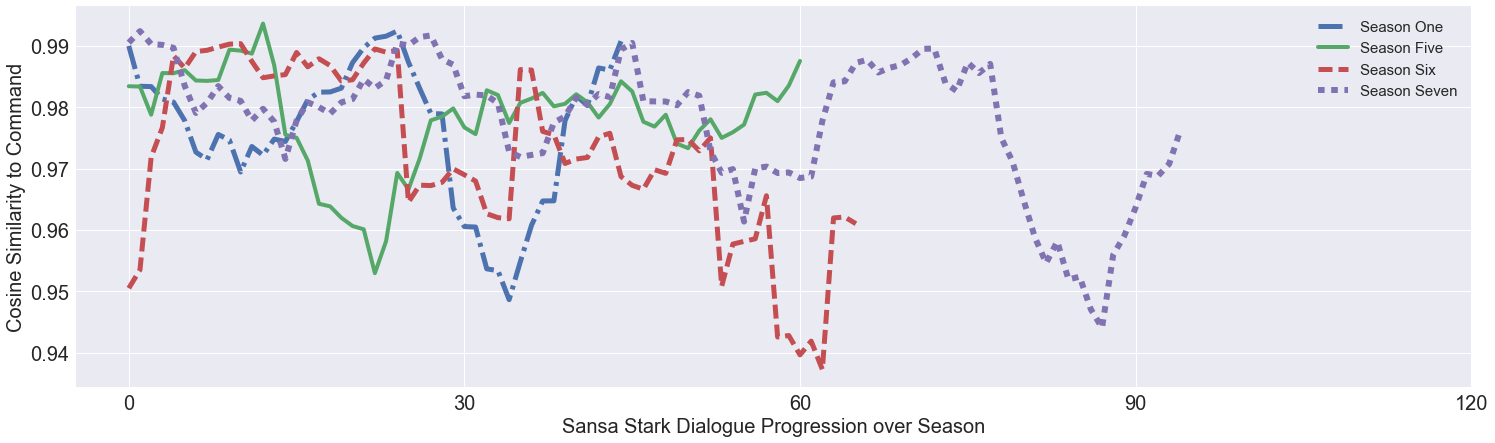

In [134]:
Sansa_Command()

In [135]:
def Dany_Command(runavg=10):
    y1 = np.array(command_DanyS1)    
    y_runavg1 = np.convolve(y1, np.ones((runavg,))/runavg, mode='valid')

    y2 = np.array(command_DanyS5)    
    y_runavg2 = np.convolve(y2, np.ones((runavg,))/runavg, mode='valid')
    
    y3 = np.array(command_DanyS6)    
    y_runavg3 = np.convolve(y3, np.ones((runavg,))/runavg, mode='valid')
    
    y4 = np.array(command_DanyS7)    
    y_runavg4 = np.convolve(y4, np.ones((runavg,))/runavg, mode='valid')
    
    
    x1 = np.array(range(0, len(y_runavg1)))
    x2 = np.array(range(0, len(y_runavg2)))
    x3 = np.array(range(0, len(y_runavg3)))
    x4 = np.array(range(0, len(y_runavg4)))
    
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x1, y_runavg1, label = 'Season One', linestyle='-.', linewidth=5);
    plt.plot(x2, y_runavg2, label = 'Season Five', linestyle='-', linewidth=4);
    plt.plot(x3, y_runavg3, label = 'Season Six', linestyle='--', linewidth=5);
    plt.plot(x4, y_runavg4, label = 'Season Seven', linestyle=':', linewidth=6);
    plt.legend(loc='lower right', prop={'size': 15})
    plt.xticks([0,40,80,120,160], fontsize = 20)
    plt.yticks([0.94,0.95,0.96,0.97,0.98,0.99], fontsize = 20)
    plt.xlabel('Daenerys Targaryen Dialogue Progression over Season', fontsize = 20)
    plt.ylabel('Cosine Similarity to Command', fontsize = 20)
    d = np.zeros(len(y_runavg2))

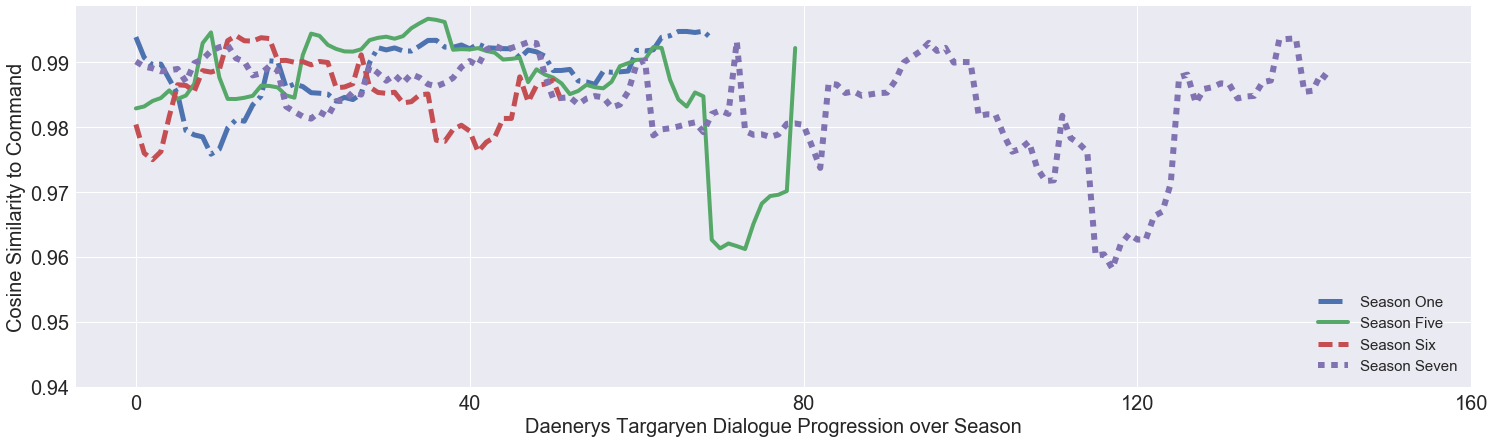

In [136]:
Dany_Command()

In [137]:
D_df=pd.DataFrame([command_DanyS1,command_DanyS5,command_DanyS6,command_DanyS7]).T
D_df.head()

0         1         2         3
0  0.995534  0.994503  0.997539  0.997887
1  0.997705  0.988010  0.994169  0.997222
2  0.997746  0.990795  0.983252  0.995592
3  0.994776  0.981903  0.940840  0.993098
4  0.990427  0.991554  0.941407  0.992441

In [138]:
S_df=pd.DataFrame([command_SansaS1,command_SansaS5,command_SansaS6,command_SansaS7]).T
S_df.head()

0         1         2         3
0  0.993979  0.998598  0.965196  0.976085
1  0.996893  0.995143  0.814212  0.998119
2  0.988075  0.921590  0.947095  0.997676
3  0.996992  0.997354  0.876769  0.996309
4  0.983444  0.992387  0.982011  0.997563

In [139]:
from __future__ import division
print 79/153*10.
print 89/153*10.
print 61/153*10.

5.16339869281
5.81699346405
3.98692810458


In [140]:
print 54/104*10.
print 70/104*10.
print 75/104*10.

5.19230769231
6.73076923077
7.21153846154


In [141]:
t=D_df[0]
t.rolling(window=5)
window=int((79/153)*10)
#window=5
D_df['Dany_roll1']=D_df[0].rolling(window=window).mean()

x1=len(D_df[0])

#D_df['Dany_roll1'].plot()
D_df.head(20)

len(D_df['Dany_roll1'])

153

In [142]:
s=S_df[0]
s.rolling(window=5)
window=int((54/104)*10)
#window=5
S_df['Sansa_roll1']=S_df[0].rolling(window=window).mean()

x1=len(S_df[0])

#S_df['Dany_roll1'].plot()
S_df.head(20)

len(S_df['Sansa_roll1'])

104

In [143]:
D_df['Dany_roll1'].dropna()

4     0.995238
5     0.995703
6     0.994784
7     0.993454
8     0.992777
9     0.992599
10    0.985809
11    0.984447
12    0.986055
13    0.982072
14    0.977684
15    0.973184
16    0.973227
17    0.971007
18    0.969642
19    0.975603
20    0.986627
21    0.989101
22    0.990903
23    0.997290
24    0.994050
25    0.993878
26    0.991208
27    0.981371
28    0.976063
29    0.978521
30    0.976811
31    0.979314
32    0.988875
33    0.992011
        ...   
49    0.990571
50    0.991610
51    0.992396
52    0.992169
53    0.991392
54    0.993655
55    0.989749
56    0.991451
57    0.991103
58    0.990576
59    0.983866
60    0.987800
61    0.986416
62    0.983224
63    0.983428
64    0.989395
65    0.989456
66    0.990577
67    0.993901
68    0.993920
69    0.994356
70    0.994085
71    0.993335
72    0.993876
73    0.994331
74    0.995202
75    0.995483
76    0.995922
77    0.995761
78    0.992948
Name: Dany_roll1, dtype: float64

In [144]:
S_df['Sansa_roll1'].dropna()

4     0.991876
5     0.991706
6     0.991722
7     0.985069
8     0.985216
9     0.988082
10    0.975109
11    0.974982
12    0.977597
13    0.976421
14    0.967537
15    0.970243
16    0.967925
17    0.973517
18    0.972827
19    0.971340
20    0.976953
21    0.976433
22    0.976090
23    0.975995
24    0.983995
25    0.985446
26    0.988451
27    0.988866
28    0.990190
29    0.990474
30    0.993910
31    0.994037
32    0.994253
33    0.994607
34    0.984196
35    0.972254
36    0.963900
37    0.963537
38    0.932544
39    0.936910
40    0.948703
41    0.943433
42    0.943208
43    0.964756
44    0.972735
45    0.972820
46    0.986014
47    0.986276
48    0.990884
49    0.990983
50    0.987707
51    0.986759
52    0.985808
53    0.990609
Name: Sansa_roll1, dtype: float64

In [145]:
def Dany_moving_ave(window=10):
    window = 5
    y1 = D_df[0]
    y1 = y1.rolling(window=window).mean()
     
    window = 6
    y2 = D_df[1]
    y2 = y2.rolling(window=window).mean()   
    
    window = 4
    y3 = D_df[2]
    y3 = y3.rolling(window=window).mean()  
    
    window = 10
    y4 = D_df[3]
    y4 = y4.rolling(window=window).mean()  
    
    
    x1 = np.array(range(0, len(D_df[0])))
    x2 = np.array(range(0, len(D_df[1])))
    x3 = np.array(range(0, len(D_df[2])))
    x4 = np.array(range(0, len(D_df[3])))
    
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x1, y1, label = 'Season One', linestyle='-.', linewidth=5);
    plt.plot(x2, y2, label = 'Season Five', linestyle='-', linewidth=4);
    plt.plot(x3, y3, label = 'Season Six', linestyle='--', linewidth=5);
    plt.plot(x4, y4, label = 'Season Seven', linestyle=':', linewidth=6);
    plt.legend(loc='lower right', prop={'size': 15})
    plt.xticks([0,20,40,60,80,100,120,140], fontsize = 20)
    plt.yticks([0.94,0.95,0.96,0.97,0.98,0.99,1.00], fontsize = 20)
    plt.xlabel('Daenerys Targaryen Dialogue Progression over Season', fontsize = 20)
    plt.ylabel('Cosine Similarity to Command', fontsize = 20)

In [146]:
def Sansa_moving_ave(window=10):
    window = 5
    y1 = S_df[0]
    y1 = y1.rolling(window=window).mean()
     
    window = 7
    y2 = S_df[1]
    y2 = y2.rolling(window=window).mean()   
    
    window = 7
    y3 = S_df[2]
    y3 = y3.rolling(window=window).mean()  
    
    window = 10
    y4 = S_df[3]
    y4 = y4.rolling(window=window).mean()  
    
    
    x1 = np.array(range(0, len(S_df[0])))
    x2 = np.array(range(0, len(S_df[1])))
    x3 = np.array(range(0, len(S_df[2])))
    x4 = np.array(range(0, len(S_df[3])))
    
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x1, y1, label = 'Season One', linestyle='-.', linewidth=5);
    plt.plot(x2, y2, label = 'Season Five', linestyle='-', linewidth=4);
    plt.plot(x3, y3, label = 'Season Six', linestyle='--', linewidth=5);
    plt.plot(x4, y4, label = 'Season Seven', linestyle=':', linewidth=6);
    plt.legend(loc='lower right', prop={'size': 15})
    plt.xticks([0,20,40,60,80,100,120,140], fontsize = 20)
    plt.yticks([0.94,0.95,0.96,0.97,0.98,0.99,1.00], fontsize = 20)
    plt.xlabel('Sansa Stark Dialogue Progression over Season', fontsize = 20)
    plt.ylabel('Cosine Similarity to Command', fontsize = 20)

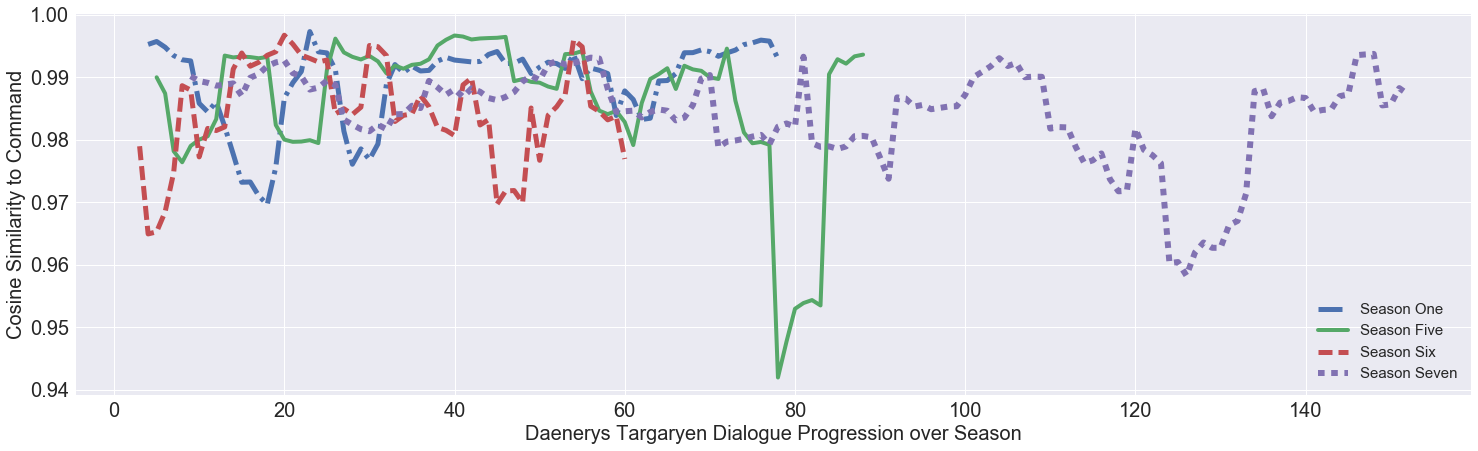

In [147]:
Dany_moving_ave()

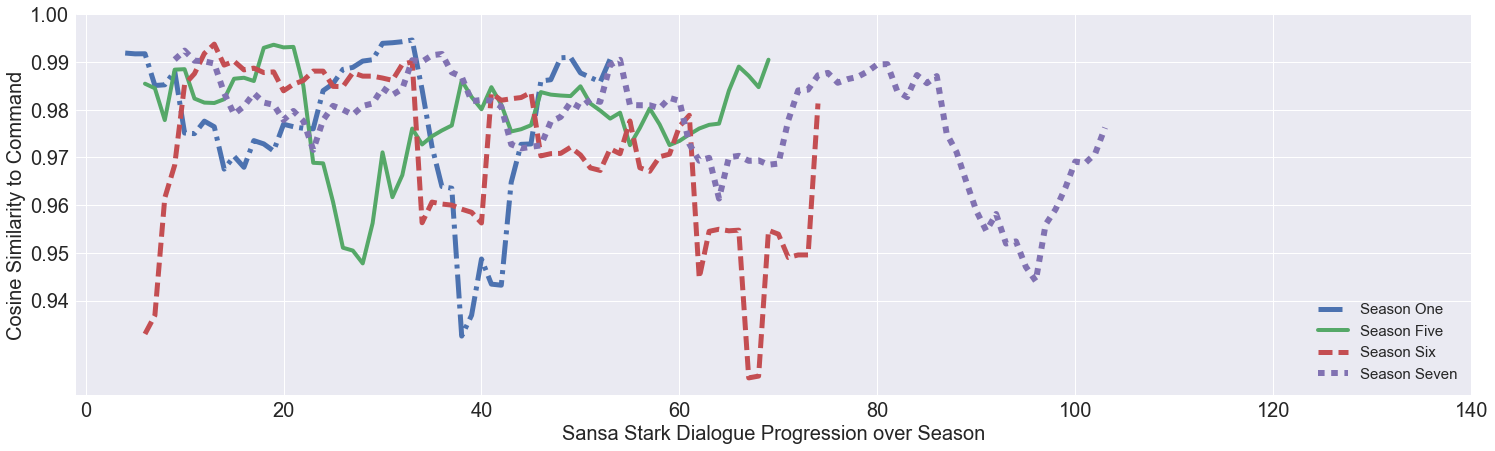

In [148]:
Sansa_moving_ave()

## T-SNE

In [296]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [297]:
model2.wv.vocab.items()

[('foul', <gensim.models.keyedvectors.Vocab at 0x116d11650>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x11c964650>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11c964610>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x11c9645d0>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x11d3e6750>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x11c9642d0>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x11c964550>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x11c964410>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x11c964590>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x11c9643d0>),
 (u'politician', <gensim.models.keyedvectors.Vocab at 0x11c964490>),
 ('stabbed', <gensim.models.keyedvectors.Vocab at 0x11c964510>),
 ('bringing', <gensim.models.keyedvectors.Vocab at 0x11cbf5b50>),
 ('disturb', <gensim.models.keyedvectors.Vocab at 0x11c964210>),
 ('prize', <gensim.models.keyedvectors.Vocab at 0x11c9641d0>),
 ('wooden', <gensim

In [298]:
model2.wv.vocab.keys()

['foul',
 'four',
 'hanging',
 'marching',
 u'increase',
 'midafternoon',
 'mutinied',
 'lord',
 u'sinking',
 'leisurely',
 u'politician',
 'stabbed',
 'bringing',
 'disturb',
 'prize',
 'wooden',
 u'clientele',
 'succession',
 'straight',
 'tired',
 u'lefford',
 'bacon',
 'elegant',
 'second',
 'sailed',
 u'ruthless',
 'thunder',
 'cooking',
 'contributed',
 'resilient',
 'succumb',
 'hero',
 'interrupting',
 u'here',
 'substance',
 u'k',
 'climbed',
 'military',
 u'climber',
 'diplomat',
 'appropriately',
 'divide',
 'explained',
 'replace',
 'brought',
 'stern',
 'cheating',
 'spoke',
 u'cannibal',
 'occupying',
 'untie',
 'strike',
 'sideface',
 'holy',
 'relax',
 'successful',
 'brings',
 'hereby',
 'hurt',
 u'glass',
 u'hole',
 'hold',
 u'simper',
 u'benjens',
 'pursue',
 'zhoan',
 'blade',
 'plunged',
 'sweeter',
 'rework',
 'example',
 'triple',
 'organized',
 u'caution',
 'want',
 'counseling',
 'mymother',
 u'cocksucker',
 'absolute',
 'hog',
 'complaining',
 u'travel',
 'cop

In [192]:
model_list = []

for i in model2.wv.vocab.keys():
    model_list.append(model2.wv[i])

In [193]:
model_list

[array([-0.21895841, -0.02763083, -0.02533996, -0.12749611, -0.11693509,
        -0.08413357, -0.11394288, -0.17344464, -0.0122849 , -0.16525616,
         0.02456509, -0.09868202,  0.13757229, -0.12037823, -0.00426018,
         0.17905527,  0.0766762 , -0.08178438, -0.11475994, -0.01547036,
        -0.23651417, -0.1689259 ,  0.03163357,  0.18515061,  0.17237356,
        -0.14502779, -0.01301234, -0.08791047, -0.07668535, -0.09223637,
        -0.2934753 ,  0.04050505, -0.00862944, -0.10292251,  0.04342626,
        -0.04497596, -0.18566832, -0.07117318,  0.07588761,  0.16731715,
        -0.11345328,  0.0137415 , -0.03094495, -0.12630787,  0.12433449,
        -0.22019088,  0.1259709 ,  0.00243215, -0.01951397,  0.17254464,
         0.21271387,  0.07118208, -0.12958622, -0.04951456, -0.12664895,
        -0.15047415,  0.00609941,  0.06127166, -0.17859294, -0.16586791,
         0.09782324, -0.08504821,  0.1577128 , -0.14914678,  0.03164778,
        -0.10216072, -0.03053574,  0.03671831,  0.0

In [194]:
model_vectors = pd.DataFrame(model_list)
model_vectors.shape

(6913, 100)

In [195]:
model_vectors = model_vectors.reset_index()

In [196]:
model_vectors['index'] = model2.wv.vocab.keys()

In [197]:
model_vectors = model_vectors.set_index('index')

In [198]:
model_vectors.head()

0         1         2         3         4         5   \
index                                                                  
foul     -0.218958 -0.027631 -0.025340 -0.127496 -0.116935 -0.084134   
four     -0.292320 -0.037228 -0.033813 -0.178397 -0.145268 -0.105070   
hanging  -0.146177 -0.024025 -0.018082 -0.086348 -0.071098 -0.057387   
marching -0.274863 -0.026962 -0.031919 -0.159898 -0.141323 -0.102162   
increase -0.050721 -0.001706 -0.009619 -0.031306 -0.025878 -0.018769   

                6         7         8         9         10        11  \
index                                                                  
foul     -0.113943 -0.173445 -0.012285 -0.165256  0.024565 -0.098682   
four     -0.160486 -0.235916 -0.027779 -0.215857  0.034977 -0.129770   
hanging  -0.081815 -0.114833 -0.013845 -0.102159  0.016630 -0.066644   
marching -0.151645 -0.233978 -0.029324 -0.202831  0.046262 -0.123036   
increase -0.030241 -0.048526 -0.007004 -0.039561  0.004097 -0.021512   

                12        13        14        15        16        17  \
index                                                                  
foul      0.137572 -0.120378 -0.004260  0.179055  0.076676 -0.081784   
four      0.181703 -0.145441 -0.007669  0.236347  0.102033 -0.101262   
hanging   0.093890 -0.072149 -0.006174  0.118313  0.054827 -0.056394   
marching  0.168382 -0.140342 -0.011753  0.227067  0.105260 -0.095929   
increase  0.038092 -0.030339  0.000564  0.044783  0.024269 -0.022324   

                18        19        20        21        22        23  \
index                                                                  
foul     -0.114760 -0.015470 -0.236514 -0.168926  0.031634  0.185151   
four     -0.151133 -0.021090 -0.310629 -0.237237  0.041922  0.239534   
hanging  -0.071275 -0.007832 -0.157815 -0.115106  0.021690  0.123213   
marching -0.131012 -0.021534 -0.296355 -0.221224  0.029678  0.234807   
increase -0.030176 -0.008697 -0.055701 -0.043480  0.012401  0.044517   

                24        25        26        27        28        29  \
index                                                                  
foul      0.172374 -0.145028 -0.013012 -0.087910 -0.076685 -0.092236   
four      0.228187 -0.198781 -0.023143 -0.108122 -0.105262 -0.118001   
hanging   0.116219 -0.098328 -0.009621 -0.061424 -0.056327 -0.060219   
marching  0.227067 -0.182869 -0.023271 -0.111961 -0.102946 -0.106298   
increase  0.042669 -0.040179 -0.005718 -0.018105 -0.015187 -0.022103   

                30        31        32        33        34        35  \
index                                                                  
foul     -0.293475  0.040505 -0.008629 -0.102923  0.043426 -0.044976   
four     -0.379778  0.052380 -0.020498 -0.130616  0.062409 -0.066047   
hanging  -0.193444  0.026974 -0.012393 -0.062632  0.026588 -0.035136   
marching -0.362918  0.051106 -0.010612 -0.131157  0.058857 -0.065418   
increase -0.067151  0.008659  0.001450 -0.025871  0.012314 -0.008490   

                36        37        38        39        40        41  \
index                                                                  
foul     -0.185668 -0.071173  0.075888  0.167317 -0.113453  0.013741   
four     -0.232509 -0.092718  0.089942  0.216443 -0.141052  0.008233   
hanging  -0.115809 -0.047035  0.050191  0.117045 -0.073334  0.007595   
marching -0.222926 -0.083284  0.087184  0.217138 -0.136456  0.004732   
increase -0.043152 -0.018767  0.018464  0.045727 -0.029332 -0.003578   

                42        43        44        45        46        47  \
index                                                                  
foul     -0.030945 -0.126308  0.124334 -0.220191  0.125971  0.002432   
four     -0.026266 -0.172420  0.159509 -0.276621  0.168638  0.004659   
hanging  -0.020652 -0.081674  0.082103 -0.142958  0.088190  0.005479   
marching -0.029290 -0.162868  0.160757 -0.266473  0.157215  0.015486   
increase -0.001616 -0.028918  0.034067 -0.053941 

In [199]:
pca20 = PCA(n_components=20)
pca50 = PCA(n_components=50)

pca_results20 = pca20.fit_transform(model_vectors)
pca_results50 = pca50.fit_transform(model_vectors)

In [200]:
pca_results_20 = pd.DataFrame(pca_results20)
pca_results_50 = pd.DataFrame(pca_results50)

In [201]:
pca_results_20 = pca_results_20.reset_index()
pca_results_50 = pca_results_50.reset_index()

In [202]:
pca_results_20['index'] = model2.wv.vocab.keys()
pca_results_50['index'] = model2.wv.vocab.keys()

In [203]:
pca_results_20 = pca_results_20.set_index('index')
pca_results_50 = pca_results_50.set_index('index')

In [204]:
pca_results_20.head()

0         1         2         3         4         5   \
index                                                                  
foul      0.474689 -0.013615 -0.026431  0.001555  0.007833 -0.007283   
four      0.849333 -0.019894 -0.015080  0.027527  0.007218 -0.000819   
hanging   0.078092 -0.007442 -0.009818  0.009329  0.000651  0.001250   
marching  0.777897 -0.000679 -0.003330  0.028825 -0.007666 -0.010115   
increase -0.420678  0.002786  0.001918 -0.001102 -0.001464  0.007452   

                6         7         8         9         10        11  \
index                                                                  
foul      0.004142  0.003128  0.000228 -0.002262 -0.001478 -0.004655   
four      0.000370  0.013364 -0.003456  0.008788 -0.007896 -0.002775   
hanging   0.006071 -0.003545 -0.005601 -0.002663 -0.006535  0.000355   
marching -0.013925 -0.004161 -0.007496 -0.003839  0.000741  0.000758   
increase  0.000481  0.001130 -0.003900 -0.000512 -0.000302  0.002565   

                12        13        14        15        16        17  \
index                                                                  
foul     -0.005156  0.006193 -0.001527 -0.001313 -0.001968 -0.001566   
four     -0.000791  0.002003  0.002752  0.003361  0.000681  0.003989   
hanging  -0.004990  0.001966 -0.001513 -0.003298  0.004782  0.000651   
marching -0.002063 -0.008236  0.003429  0.001463 -0.001657 -0.002010   
increase  0.004947 -0.000338 -0.002923  0.001308 -0.006971  0.002741   

                18        19  
index                         
foul      0.002061 -0.001599  
four     -0.002627  0.007429  
hanging  -0.003719 -0.006147  
marching  0.002613  0.003620  
increase  0.000515  0.001885

In [205]:
pca_results_50.head()

0         1         2         3         4         5   \
index                                                                  
foul      0.474689 -0.013615 -0.026431  0.001555  0.007833 -0.007283   
four      0.849333 -0.019894 -0.015080  0.027527  0.007218 -0.000819   
hanging   0.078092 -0.007442 -0.009818  0.009329  0.000651  0.001250   
marching  0.777897 -0.000679 -0.003330  0.028825 -0.007666 -0.010115   
increase -0.420678  0.002786  0.001918 -0.001102 -0.001464  0.007452   

                6         7         8         9         10        11  \
index                                                                  
foul      0.004142  0.003128  0.000227 -0.002262 -0.001478 -0.004655   
four      0.000370  0.013364 -0.003456  0.008786 -0.007896 -0.002779   
hanging   0.006070 -0.003545 -0.005601 -0.002662 -0.006535  0.000359   
marching -0.013925 -0.004161 -0.007496 -0.003838  0.000739  0.000758   
increase  0.000481  0.001130 -0.003901 -0.000512 -0.000301  0.002565   

                12        13        14        15        16        17  \
index                                                                  
foul     -0.005155  0.006190 -0.001530 -0.001320 -0.002024 -0.001550   
four     -0.000789  0.001997  0.002722  0.003343  0.000653  0.003990   
hanging  -0.004995  0.001966 -0.001494 -0.003282  0.004764  0.000658   
marching -0.002063 -0.008233  0.003440  0.001480 -0.001697 -0.001967   
increase  0.004949 -0.000342 -0.002936  0.001296 -0.007052  0.002794   

                18        19        20        21        22        23  \
index                                                                  
foul      0.002062 -0.001619 -0.000180  0.000227 -0.003269  0.001675   
four     -0.002689  0.007517 -0.002357  0.002747 -0.001412 -0.002194   
hanging  -0.003683 -0.006110  0.002515  0.002692 -0.002687 -0.003326   
marching  0.002646  0.003722  0.008891  0.002724  0.002916  0.001271   
increase  0.000588  0.001785  0.000991  0.000796 -0.005198  0.002996   

                24        25        26        27        28        29  \
index                                                                  
foul     -0.000528 -0.006400 -0.002048  0.000483 -0.006492 -0.001257   
four      0.000063  0.003858  0.006363 -0.001393  0.002360  0.005085   
hanging   0.003352  0.004048 -0.003702 -0.002388  0.000878 -0.005629   
marching -0.001442  0.001238  0.000046 -0.005243 -0.004592  0.000282   
increase  0.001563  0.000706 -0.000564  0.001770 -0.003862  0.004646   

                30        31        32        33        34        35  \
index                                                                  
foul      0.002170  0.001052  0.001317 -0.000684 -0.003577 -0.000746   
four      0.004042 -0.000338  0.004045 -0.002222  0.000911 -0.002581   
hanging  -0.003827 -0.003986 -0.002265  0.004816  0.000421 -0.000881   
marching -0.001244 -0.004637 -0.001982  0.002273  0.000270 -0.002463   
increase -0.006829  0.004211  0.000874  0.003218 -0.002605  0.000726   

                36        37        38        39        40        41  \
index                                                                  
foul      0.000304  0.001407 -0.002877 -0.001089  0.001580 -0.001457   
four      0.001210  0.000979  0.001836  0.004713 -0.003123 -0.002697   
hanging  -0.000781  0.001167 -0.007246  0.001348 -0.002135  0.000690   
marching  0.002354 -0.006582  0.003763 -0.001867  0.000302 -0.002230   
increase  0.000154  0.002137 -0.003212 -0.001730  0.005530 -0.002463   

                42        43        44        45        46        47  \
index                                                                  
foul     -0.001979 -0.001443  0.003949  0.005808 -0.000898  0.000397   
four     -0.003097 -0.001085  0.001913 -0.005103  0.002033  0.002059   
hanging   0.002328  0.004555  0.001138  0.002357 -0.001353 -0.003787   
marching -0.006799  0.005570  0.000566  0.000201 -0.003101 -0.005802   
increase -0.005149  0.000199 -0.000920 -0.003216 

In [206]:
tsne = TSNE(n_components=2)

tsne_pca_results20 = tsne.fit_transform(pca_results20)
tsne_pca_results50 = tsne.fit_transform(pca_results50)

In [207]:
tsne_pca_results_20 = pd.DataFrame(tsne_pca_results20)
tsne_pca_results_50 = pd.DataFrame(tsne_pca_results50)

In [208]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()
tsne_pca_results_50 = tsne_pca_results_50.reset_index()

In [209]:
tsne_pca_results_20['index'] = model2.wv.vocab.keys()
tsne_pca_results_50['index'] = model2.wv.vocab.keys()

In [210]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')
tsne_pca_results_50 = tsne_pca_results_50.set_index('index')

In [211]:
tsne_pca_results_20.head(10)

0             1
index                                   
foul         -9.975996e+14 -1.464251e+16
four         -3.076685e+16 -1.790722e+17
hanging      -4.798627e+15  5.664168e+16
marching     -8.322796e+15 -6.473470e+16
increase     -1.008837e+16 -2.261443e+16
midafternoon -3.910365e+14 -1.743923e+16
mutinied      1.437132e+15 -2.030047e+17
lord         -6.754347e+16 -6.474843e+16
sinking      -2.064526e+17 -1.078260e+18
leisurely    -6.821710e+15 -6.562077e+16

In [212]:
tsne_pca_results_50.head(10)

0             1
index                                   
foul         -1.386226e+17 -3.899036e+16
four         -1.046255e+16 -2.100086e+16
hanging      -1.993466e+15  6.878746e+14
marching     -2.160945e+16 -4.094508e+16
increase     -1.028987e+15 -4.948704e+16
midafternoon -3.327806e+16 -4.329291e+16
mutinied      3.496745e+15 -2.262644e+16
lord         -2.228017e+16  3.559105e+16
sinking       9.624072e+14 -5.042417e+16
leisurely    -1.121176e+17  1.451831e+16

In [213]:
tsne_pca_results20

array([[ -9.97599567e+14,  -1.46425130e+16],
       [ -3.07668525e+16,  -1.79072174e+17],
       [ -4.79862686e+15,   5.66416842e+16],
       ..., 
       [ -2.31533254e+16,   4.96860342e+16],
       [ -1.23644711e+16,  -2.34643331e+16],
       [ -7.22218699e+16,   1.05559853e+17]])

In [214]:
tsne_pca_results50

array([[ -1.38622625e+17,  -3.89903623e+16],
       [ -1.04625467e+16,  -2.10008563e+16],
       [ -1.99346577e+15,   6.87874554e+14],
       ..., 
       [  7.11088359e+15,  -2.77318333e+16],
       [  2.78712806e+15,   3.02658131e+14],
       [ -1.11248771e+18,   2.98234129e+17]])

In [215]:
tsne_pca_results_20.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

In [ ]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = tsne_pca_results_20.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(tsne_pca_results20, axis=0)[0]
max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results20[row_id, 0]
    y = tsne_pca_results20[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_2000.png");

In [ ]:
import numpy as Math
import pylab as Plot

rows = tsne_pca_results_50.index

Plot.figure(figsize=(20, 20))
max_x = Math.amax(tsne_pca_results50, axis=0)[0]
max_y = Math.amax(tsne_pca_results50, axis=0)[1]
Plot.xlim((-max_x,max_x))
Plot.ylim((-max_y,max_y))

Plot.scatter(tsne_pca_results50[:, 0], tsne_pca_results50[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results50[row_id, 0]
    y = tsne_pca_results50[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_5000.png");